<a href="https://colab.research.google.com/github/YounseoKim62/python_for_DA/blob/main/1_apt_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 내용

* 공공데이터를 활용해 전혀 다른 두 개의 데이터를 가져와서 전처리 하고 병합하기
* 수치형 데이터와 범주형 데이터를 바라보는 시각을 기르기
* 데이터의 형식에 따른 다양한 시각화 방법 이해하기

## 패키지 불러오기

In [ ]:
import pandas as pd
import numpy as np

## 데이터 로드

### 2019년 12월 평균 분양가격 파일 로드

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df_last = pd.read_csv('/content/drive/MyDrive/데이터 분석/공부/1. 신규 민간 아파트 분양가 분석/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv',
                      encoding = 'cp949',
                      engine = 'python')

Mounted at /content/drive


NameError: name 'pd' is not defined

* 한글로 설정된 엑셀 파일은 인코딩을 설정해주어야 한글이 깨지지 않음
* 보통 cp949 또는 euc-kr로 인코딩 되어 있음

In [ ]:
# shape을 사용하여 행과 열의 갯수를 출력
df_last.shape

(4335, 5)

In [ ]:
# head를 사용하여 첫 10개의 row를 미리보기
df_last.head(10)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
5,인천,전체,2015,10,3163
6,인천,전용면적 60㎡이하,2015,10,3488
7,인천,전용면적 60㎡초과 85㎡이하,2015,10,3119
8,인천,전용면적 85㎡초과 102㎡이하,2015,10,3545
9,인천,전용면적 102㎡초과,2015,10,3408


In [ ]:
# tail을 사용하여 마지막 5개의 row를 미리보기
df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


### 과거 평균 분양 가격 데이터 로드

In [ ]:
df_first = pd.read_csv('/content/drive/MyDrive/데이터 분석/공부/1. 신규 민간 아파트 분양가 분석/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv',
                      encoding = 'cp949',
                      engine = 'python')

In [ ]:
df_first.shape

(17, 22)

In [ ]:
df_first.head(10)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,...,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,...,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,...,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,...,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,...,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


### 데이터 요약

In [ ]:
# info()를 사용하여 변수 별 정보를 확인
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [ ]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

### 결측치 확인

In [ ]:
#isnull().sum() 을 통해 각 변수 별 결측치 갯수를 확인
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [ ]:
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

### '분양가격(㎡)' 데이터 타입 변경

In [ ]:
# pd.to_numeric을 사용하여 object 타입으로 저장된 '분양가격'을 float64 (numeric) 타입으로 변경
df_last['분양가격'] = pd.to_numeric(df_last['분양가격(㎡)'], errors = 'coerce')
df_last['분양가격'].head()

0    5841.0
1    5652.0
2    5882.0
3    5721.0
4    5879.0
Name: 분양가격, dtype: float64

* '분양가격'에 결측치들이 있기 때문에 errors = 'coerce'로 설정하여 numeric으로 변형시키지 못하는 값들은 NaN으로 저장

### '평당분양가격' 구하기

In [ ]:
df_last['평당분양가격'] = df_last['분양가격'] * 3.3
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7


* 과거 평균 분양 가격 데이터의 평균 분양 가격의 m^2당 평균분양가격이 아닌 평당 평균분양가격 기준으로 되어있음
* 1평 = 3.3m^2이기 때문에 3.3을 곱해 평당분양가격 변수 생성

### '분양가격' 요약

In [ ]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [ ]:
# describe()를 object 변수에 사용
df_last['분양가격(㎡)'].describe()

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

* top은 변수에서 가장 많이 나타난 값
* freq는 top이 나타난 횟수

In [ ]:
# nunique()를 사용해 unique value의 갯수를 확인
df_last['분양가격(㎡)'].nunique()

1753

In [ ]:
# describe() numeric 변수에 사용
df_last['분양가격'].describe()

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

### '규모구분'을 '전용면적' 변수로 변경

In [ ]:
# unique()를 사용하여 object 변수의 unique 값들을 확인
df_last['규모구분'].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [ ]:
# str accessor의 replace()를 사용하여 단어들을 변경
# str accessor의 strip()을 사용하여 앞뒤의 space를 제거
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적', '')
df_last['전용면적'] = df_last['전용면적'].str.replace('이하', '')
df_last['전용면적'] = df_last['전용면적'].str.replace('초과', '~')
df_last['전용면적'] = df_last['전용면적'].str.replace(' ', '')
df_last['전용면적'] = df_last['전용면적'].str.strip()
df_last['전용면적']

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

* '규모구분'의 unique value들을 좀 더 직관적으로 변경
* 예시: 전용면적 60㎡초과 85㎡이하 -> 60㎡~85㎡

### 필요없는 변수 제거

In [ ]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
 7   전용면적     4335 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 271.1+ KB


In [ ]:
# drop을 사용하여 필요없는 row 또는 column 제거
# axis = 0: row, axis = 1: column
df_last = df_last.drop(['규모구분', '분양가격(㎡)'], axis = 1)

* '규모구분'은 '전용면적'으로 변경했기에 제거
* '분양가격(㎡)'은 '분양가격'과 '평당분양가격'으로 변경했기에 제거

In [ ]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   연도      4335 non-null   int64  
 2   월       4335 non-null   int64  
 3   분양가격    3957 non-null   float64
 4   평당분양가격  3957 non-null   float64
 5   전용면적    4335 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


* 변수제거를 통해 메모리 사용량을 줄일 수 있음
* 271.1 KB -> 203.3 KB

## groupby로 데이터 집계

In [ ]:
# 지역당 분양가격의 평균
df_last.groupby(['지역명'])['평당분양가격'].mean()

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [ ]:
# 전용면적당 분양가격 평균
df_last.groupby(['전용면적'])['평당분양가격'].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [ ]:
# 지역명, 전용면적으로 평당분양가격의 평균
df_last.groupby(['지역명', '전용면적'])['평당분양가격'].mean().unstack().round()

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,전체
지역명,,,,,
강원,8311.0,7567.0,7486.0,8750.0,7478.0
경기,14772.0,13252.0,12524.0,13678.0,12560.0
경남,10358.0,8689.0,8619.0,10018.0,8659.0
경북,9157.0,7883.0,8061.0,8774.0,8079.0
광주,11042.0,9431.0,9911.0,9296.0,9904.0
대구,13087.0,11992.0,11779.0,11141.0,11771.0
대전,14877.0,9176.0,9711.0,9037.0,9786.0
부산,13208.0,11354.0,11865.0,12073.0,11936.0
서울,23446.0,23213.0,22787.0,25944.0,22610.0


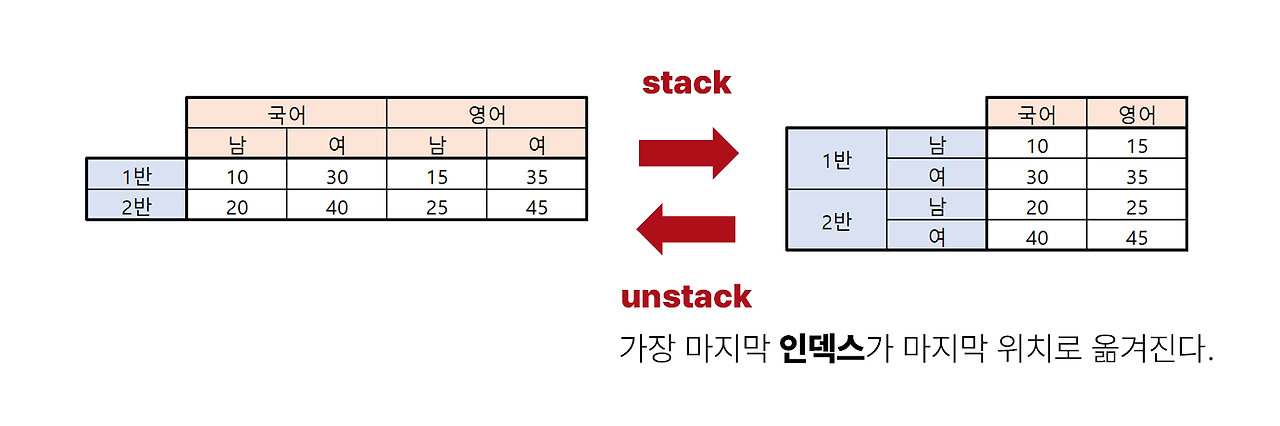

In [ ]:
# 연도, 지역명으로 평당분양가의 평균
a = df_last.groupby(['연도', '지역명'])['평당분양가격'].mean()
a

연도    지역명
2015  강원      7188.060000
      경기     11060.940000
      경남      8459.220000
      경북      7464.160000
      광주      7916.700000
                 ...     
2019  전남      8219.275862
      전북      8532.260000
      제주     11828.469231
      충남      8748.840000
      충북      7970.875000
Name: 평당분양가격, Length: 85, dtype: float64

In [ ]:
# loc[]을 사용하여 2018 row의 값을 가져옴
a = a.unstack()

a.loc[2018]

지역명
강원     8219.255000
경기    14258.420000
경남     9327.670000
경북     8680.776923
광주     9526.953333
대구    12139.252632
대전    10234.106667
부산    12889.965000
서울    23202.245000
세종    10340.463158
울산    10241.400000
인천    11881.532143
전남     7929.845000
전북     8174.595000
제주    11935.968000
충남     8201.820000
충북     8149.295000
Name: 2018, dtype: float64

In [ ]:
# transpose()를 사용하여 row와 column을 바꿈
a.transpose()

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,7188.060,7162.903846,7273.560000,8219.255000,8934.475000
경기,11060.940,11684.970000,12304.980000,14258.420000,15665.540000
경남,8459.220,8496.730000,8786.760000,9327.670000,10697.615789
경북,7464.160,7753.405000,8280.800000,8680.776923,9050.250000
광주,7916.700,9190.683333,9613.977551,9526.953333,12111.675000
대구,9018.900,10282.030000,12206.700000,12139.252632,14081.650000
대전,8190.600,8910.733333,9957.158491,10234.106667,12619.200000
부산,10377.400,10743.535000,11560.680000,12889.965000,13537.865000
서울,20315.680,21753.435000,21831.060000,23202.245000,28286.830000


## pivot table로 데이터 집계
* 기본적인 연산을 위해서라면 groupby나 pivot_table이나 큰 상관은 없음
* 하지만 pivot_table은 항상 데이터프레임으로 groupby는 column이 series 형태라면 series 형태로 반환 <br/> (groupby는 unstack()을 사용해야 데이터프레임으로 집계)

In [ ]:
# 지역당 분양가격의 평균
pd.pivot_table(df_last, index = ['지역명'], values = ['평당분양가격'], aggfunc = 'mean')

,평당분양가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


In [ ]:
# 전용면적당 분양가격 평균
pd.pivot_table(df_last, index = ['전용면적'], values = ['평당분양가격'], aggfunc = 'mean')

,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [ ]:
# 지역명, 전용면적으로 평당분양가격의 평균
pd.pivot_table(df_last, index = ['전용면적'], columns = ['지역명'], values = ['평당분양가격'], aggfunc = 'mean')

평당분양가격                                                      \
지역명                강원         경기            경남           경북            광주   
전용면적                                                                        
102㎡~     8311.380000  14771.790  10358.363265  9157.302000  11041.532432   
60㎡       7567.098000  13251.744   8689.175000  7883.172000   9430.666667   
60㎡~85㎡   7485.588000  12523.566   8618.676000  8061.372000   9910.692000   
85㎡~102㎡  8749.557143  13677.774  10017.612000  8773.814634   9296.100000   
전체        7477.536000  12559.602   8658.672000  8078.532000   9903.630000   

                                                                          \
지역명                 대구            대전         부산         서울            세종   
전용면적                                                                       
102㎡~     13087.338000  14876.871429  13208.250  23446.038  10106.976000   
60㎡       11992.068000   9176.475000  11353.782  23212.794   9323.927027   
60㎡~85㎡   11778.690000   9711.372000  11864.820  22786.830   9775.458000   
85㎡~102㎡  11140.642857   9037.430769  12072.588  25943.874   9847.926000   
전체        11771.298000   9786.018000  11936.166  22610.346   9805.422000   

                                                                           \
지역명                 울산            인천         전남          전북            제주   
전용면적                                                                        
102㎡~      9974.448000  14362.030435  8168.4900  8193.57000  10522.787234   
60㎡        9202.106897  11241.318000  7210.1700  7609.93200  14022.221053   
60㎡~85㎡   10502.531707  11384.406000  7269.2400  7271.35200  10621.314000   
85㎡~102㎡   8861.007692  11527.560000  7908.8625  8275.78125  10709.082353   
전체        10492.712195  11257.026000  7283.5620  7292.60400  10784.994000   

                                 
지역명                충남        충북  
전용면적                             
102㎡~     8689.169388  8195.352  
60㎡       7911.156000  7103.118  
60㎡~85㎡   7818.954000  7264.488  
85㎡~102㎡  9120.045000  8391.306  
전체        7815.324000  7219.014

In [ ]:
b = pd.pivot_table(df_last, index = ['연도', '지역명'], values = ['평당분양가격'], aggfunc = 'mean')
b.loc[2017]

KeyError: '평당분양가격'

## 2015 ~ 2019년 평균 분양 가격 데이터 시각화

### plt 폰트 설정

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


!apt-get update -qq
!apt-get install fonts-nanum* -qq

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)

plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'})

mpl.rcParams['axes.unicode_minus'] = False # 음수가 깨질때

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


* plt.rc()에서 plt의 다양한 기본설정을 변경 할 수 있음
* 선의 굵기, 폰트, figure size 등

> Add blockquote



### Pandas로 시각화 - line graph and bar graph

<AxesSubplot:xlabel='지역명'>

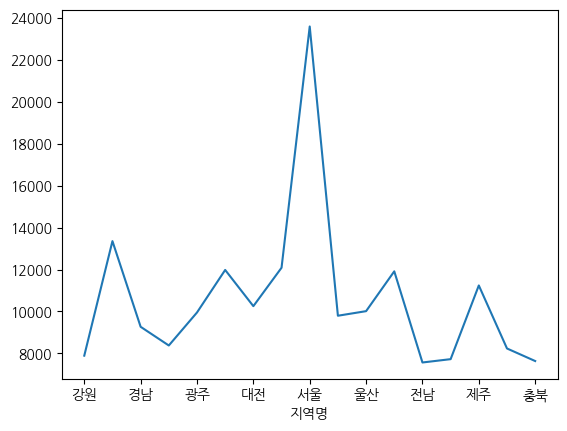

In [ ]:
# 지역당 분양가격의 평균을 line graph로 시각화
a = df_last.groupby(['지역명'])['평당분양가격'].mean()
a.plot()

<AxesSubplot:xlabel='지역명'>

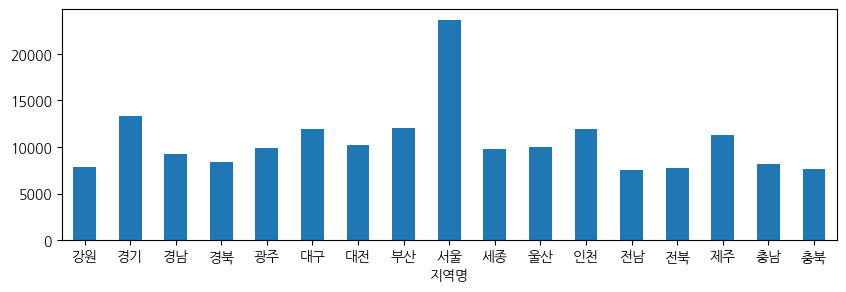

In [ ]:
# 지역당 분양가격의 평균을 bar graph로 시각화
a.plot.bar(rot = 0, figsize = (10, 3))

<AxesSubplot:xlabel='전용면적'>

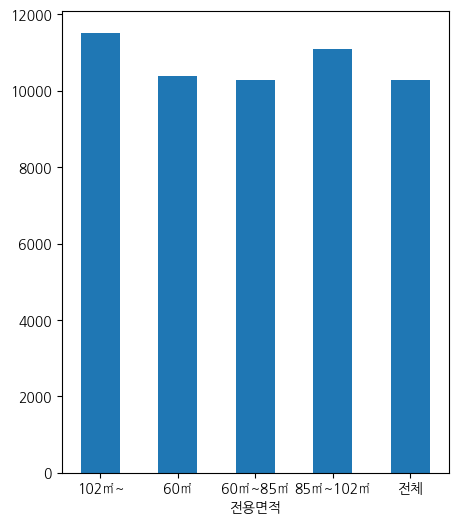

In [ ]:
# 전용면적당 분양가격의 평균을 bar graph로 시각화
a = df_last.groupby(['전용면적'])['평당분양가격'].mean()
a.plot.bar(rot = 0, figsize = (5, 6))

<AxesSubplot:xlabel='연도'>

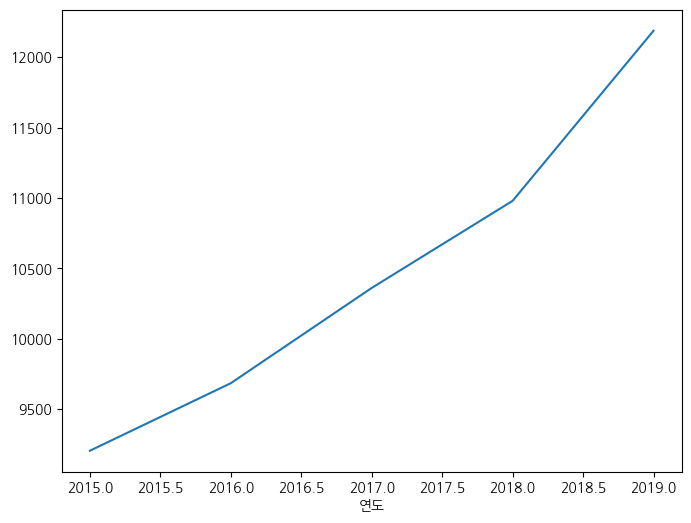

In [ ]:
# 연도별 분양가격의 평균을 bar graph로 시각화
a = df_last.groupby(['연도'])['평당분양가격'].mean().round()
a.plot(rot = 0, figsize = (8, 6))

### box and whisker plot | diagram

In [ ]:
df_last.pivot_table(index = '월', columns = '연도', values = '평당분양가격')

연도,2015,2016,2017,2018,2019
월,,,,,
1,NaN,9334.029630,10095.132143,10719.148000,11535.540789
2,NaN,9361.440000,10110.885714,10766.668000,11574.793421
3,NaN,9423.276923,10107.428571,10905.488000,11610.094737
4,NaN,9601.993902,10217.232143,10920.728571,11777.876000
5,NaN,9602.396341,10358.819277,11087.485714,11976.394737
6,NaN,9676.042683,10431.618072,10921.928571,12401.884000
7,NaN,9700.551220,10549.536585,10868.376316,12424.852000
8,NaN,9719.023171,10564.869512,10811.147368,12523.896000
9,NaN,9737.656098,10583.601266,10915.257692,12527.571429


<Axes: >

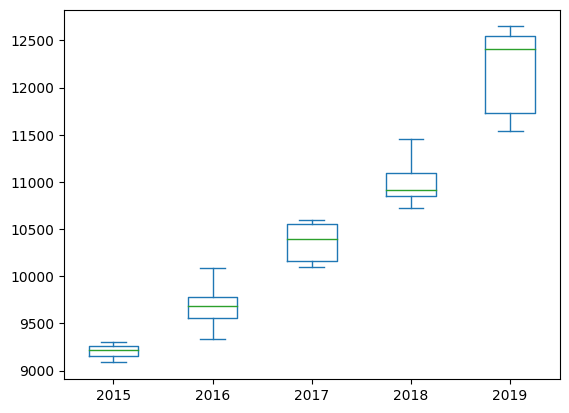

In [ ]:
df_last.pivot_table(index = '월', columns = '연도', values = '평당분양가격').plot.box()

In [ ]:
p = df_last.pivot_table(index = '월', columns = ['연도', '전용면적'], values = '평당분양가격')
p.plot.box(figsize = (15, 3), rot = 30)

연도       2015                                                            2016  \
전용면적    102㎡~         60㎡      60㎡~85㎡    85㎡~102㎡           전체         102㎡~   
월                                                                               
1         NaN         NaN          NaN         NaN          NaN   9915.840000   
2         NaN         NaN          NaN         NaN          NaN   9861.060000   
3         NaN         NaN          NaN         NaN          NaN   9952.092857   
4         NaN         NaN          NaN         NaN          NaN  10282.181250   
5         NaN         NaN          NaN         NaN          NaN  10177.200000   
6         NaN         NaN          NaN         NaN          NaN  10181.118750   
7         NaN         NaN          NaN         NaN          NaN  10225.050000   
8         NaN         NaN          NaN         NaN          NaN  10355.193750   
9         NaN         NaN          NaN         NaN          NaN  10361.175000   
10    9631.82  8794.91250  8831.964706  9416.96250  8823.229412  10791.582353   
11    9932.78  8903.60625  8875.641176  9586.50000  8879.329412  11061.405882   
12    9947.08  9156.05625  8967.847059  9552.05625  8976.582353  11261.929412   

연도                                                         ...          2018  \
전용면적          60㎡      60㎡~85㎡      85㎡~102㎡           전체  ...         102㎡~   
월                                                          ...                 
1     9195.243750  9035.205882   9554.118750  9042.970588  ...  11220.220000   
2     9228.243750  9033.070588   9725.980000  9052.676471  ...  11243.100000   
3     9218.756250  9059.276471  10006.778571  9063.741176  ...  11320.320000   
4     9260.382353  9173.805882  10230.000000  9177.494118  ...  11125.840000   
5     9343.270588  9210.105882  10161.800000  9219.229412  ...  11536.800000   
6     9302.117647  9340.164706  10349.900000  9315.900000  ...  11101.907143   
7     9310.076471  9368.311765  10377.400000  9332.400000  ...  11079.750000   
8     9290.664706  9380.152941  10315.800000  9360.935294  ...  10994.185714   
9     9449.841176  9338.417647  10295.560000  9345.600000  ...  11529.540000   
10    9651.529412  9554.664706  10082.664706  9540.688235  ...  11827.860000   
11    9673.852941  9498.952941  10147.912500  9491.964706  ...  12028.940000   
12    9829.923529  9559.711765  10245.881250  9572.911765  ...  12261.040000   

연도                                                                  2019  \
전용면적          60㎡       60㎡~85㎡      85㎡~102㎡            전체        102㎡~   
월                                                                          
1     10839.40000  10160.505882  11286.000000  10362.776471  12322.64000   
2     10852.16000  10281.052941  11292.600000  10416.158824  12398.32000   
3     10970.74000  10430.717647  11505.600000  10568.347059  12491.38000   
4     11002.20000  10496.523529  11575.575000  10625.029412  12980.22000   
5     11027.98125  10641.141176  11727.100000  10741.888235  13371.80625   
6     11038.50000  10618.429412  11340.069231  10647.741176  13674.32000   
7     10628.20000  10617.264706  11624.376923  10579.217647  13533.91875   
8     10609.94000  10604.841176  11440.592308  10562.911765  13702.01250   
9     10539.54000  10813.905882  10983.814286  10749.652941  13854.01875   
10    10679.02000  10921.447059  11488.950000  10840.111765  13801.01250   
11    10827.91875  10986.476471  11495.078571  10904.364706  13873.40625   
12    11082.72000  11271.562500  11554.714286  11138.943750  13832.06000   

연도                                                            
전용면적           60㎡       60㎡~85㎡      85㎡~102㎡            전체  
월                                                             
1     11130.900000  11375.100000  11640.514286  11245.575000  
2     11190.520000  11394.075000  11667.150000  11262.900000  
3     11161.920000  11456.156250  11644.050000  11328.281250  
4     11243.807143  11505.037500  11777.464286  11391.187500  
5

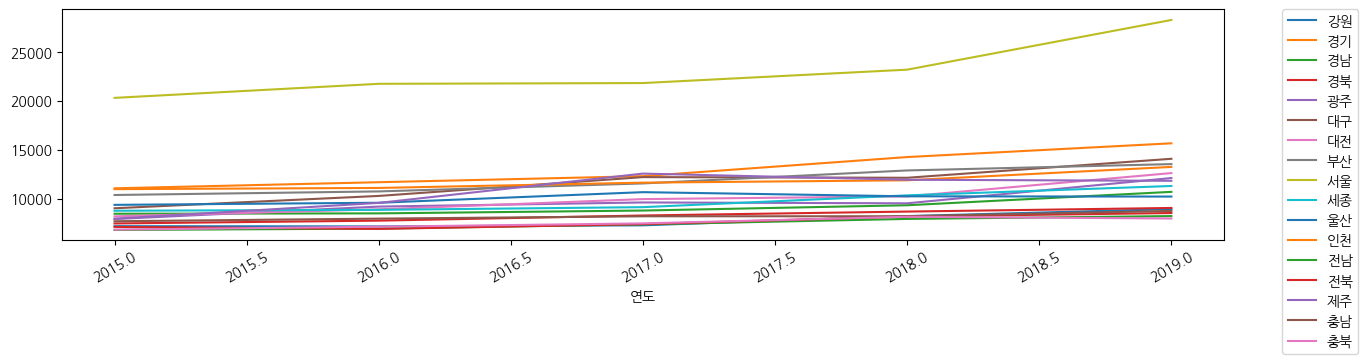

In [ ]:
p = df_last.pivot_table(index = '연도', columns = '지역명', values = '평당분양가격')
p.plot(figsize = (15, 3), rot = 30)
# legend 표시
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

### Seaborn 으로 시각화

In [ ]:
import seaborn as sns

<Axes: xlabel='지역명', ylabel='평당분양가격'>

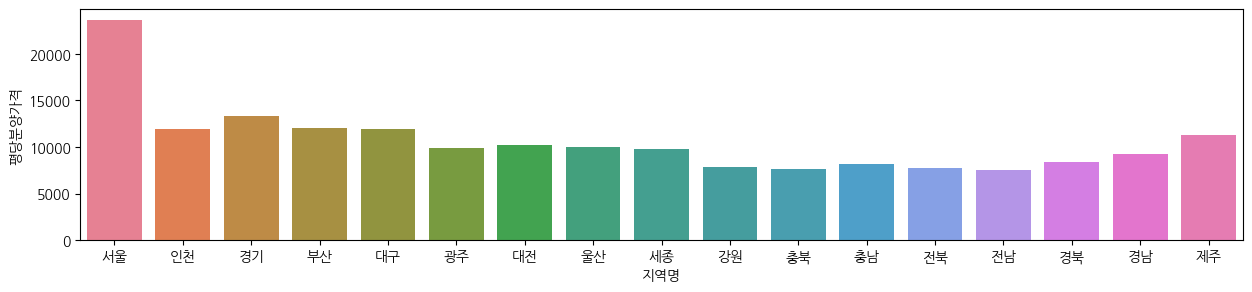

In [ ]:
plt.figure(figsize = (15, 3))
sns.barplot(data = df_last, x = '지역명', y = '평당분양가격', errorbar = None, hue = '지역명')

<Axes: xlabel='연도', ylabel='평당분양가격'>

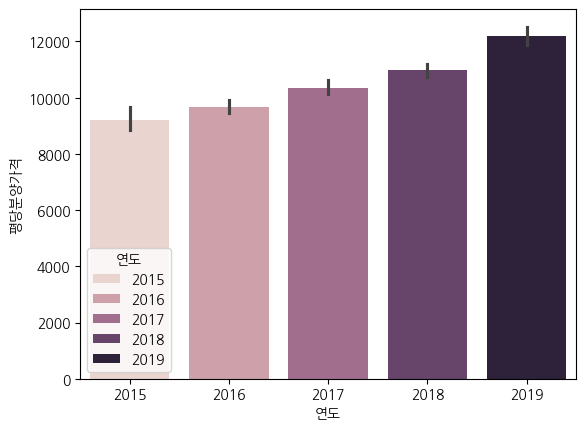

In [ ]:
sns.barplot(data = df_last, x = '연도', y = '평당분양가격', hue = '연도')

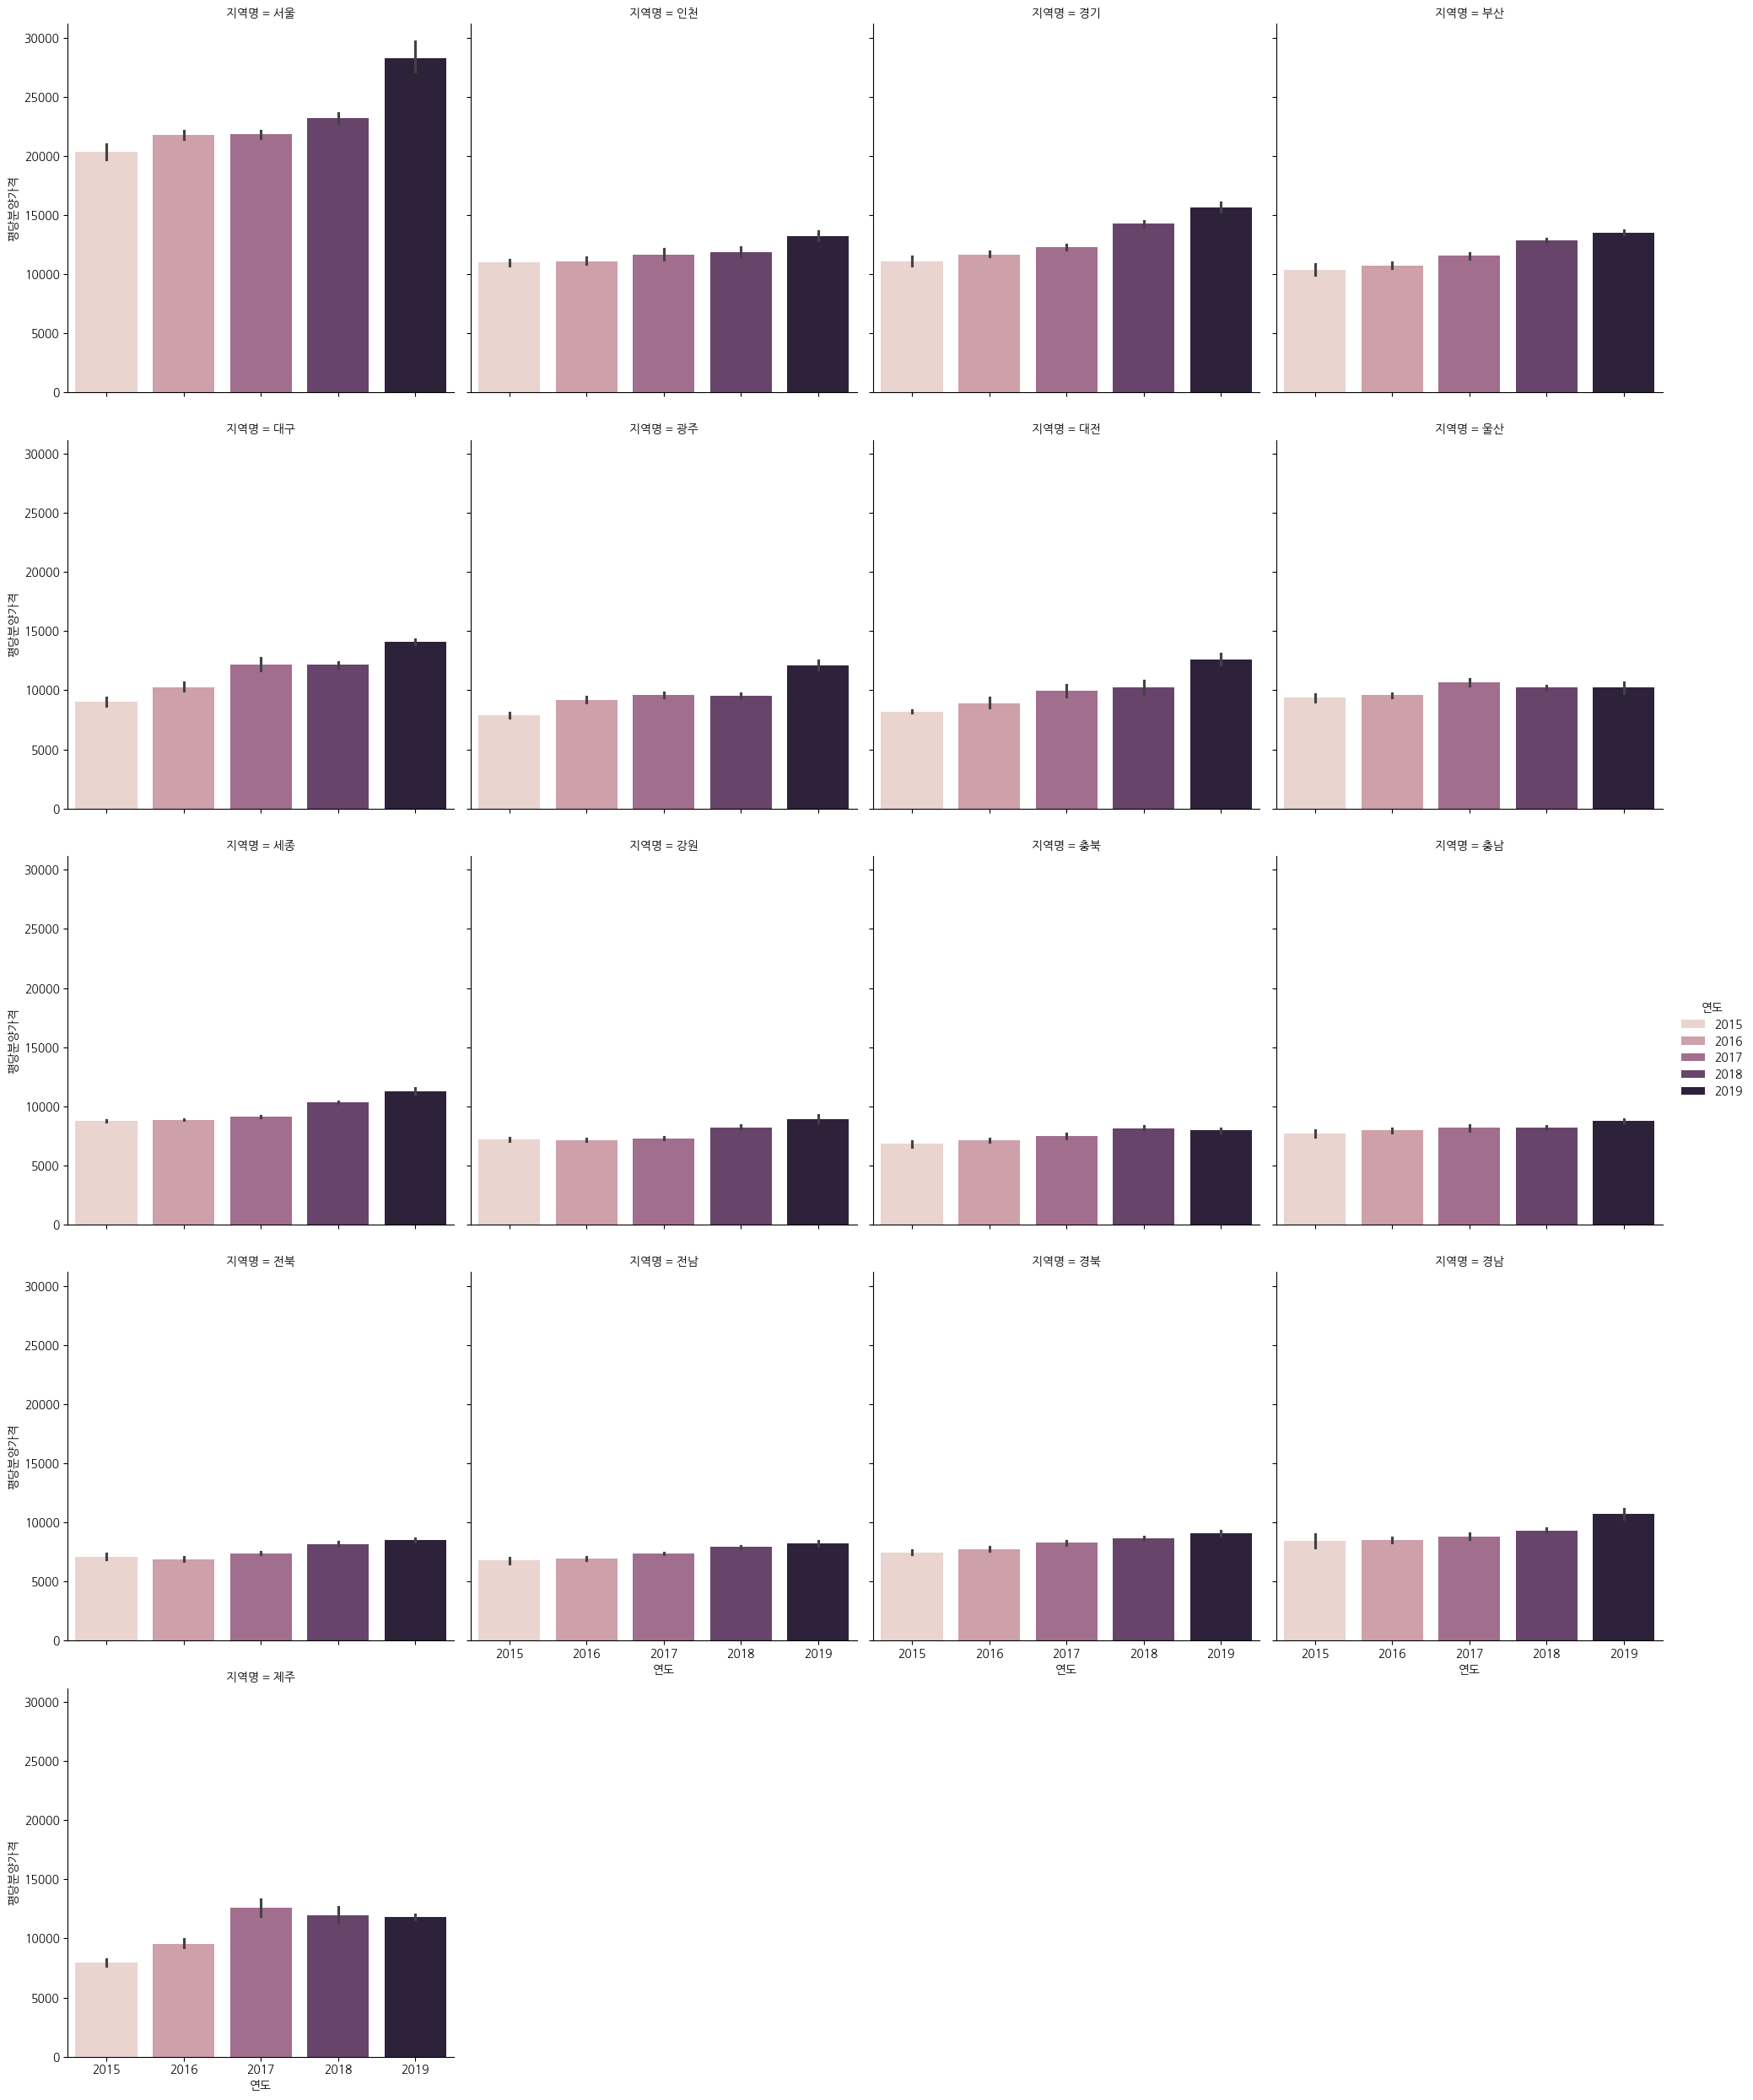

In [ ]:
# catplot은 범주형 변수를 시각화
# col_wrap은 한 가로줄당 그래프 수
sns.catplot(data = df_last, x = '연도', y = '평당분양가격', kind = 'bar', col = '지역명', col_wrap = 4, hue = '연도')

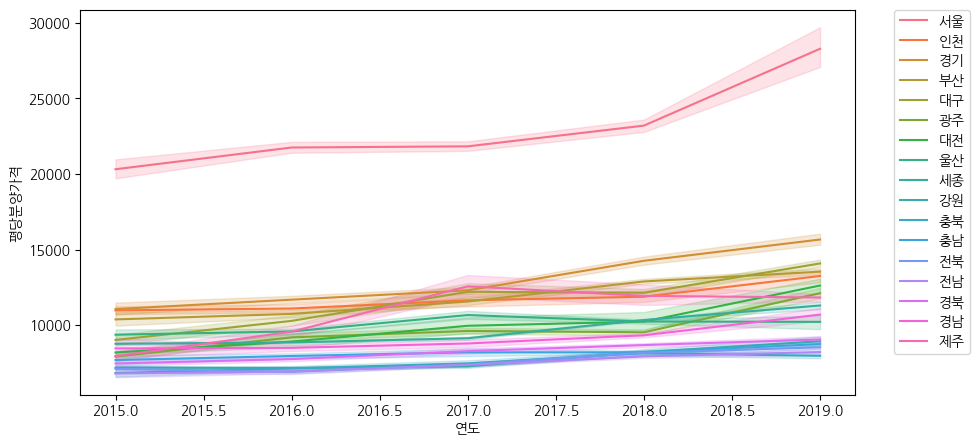

In [ ]:
# lineplot을 사용해 연도별 평당분양가격을 시각화
plt.figure(figsize = (10, 5))
sns.lineplot(data = df_last, x = '연도', y = '평당분양가격', hue = '지역명')
# legend를 그래프 밖에 표지
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

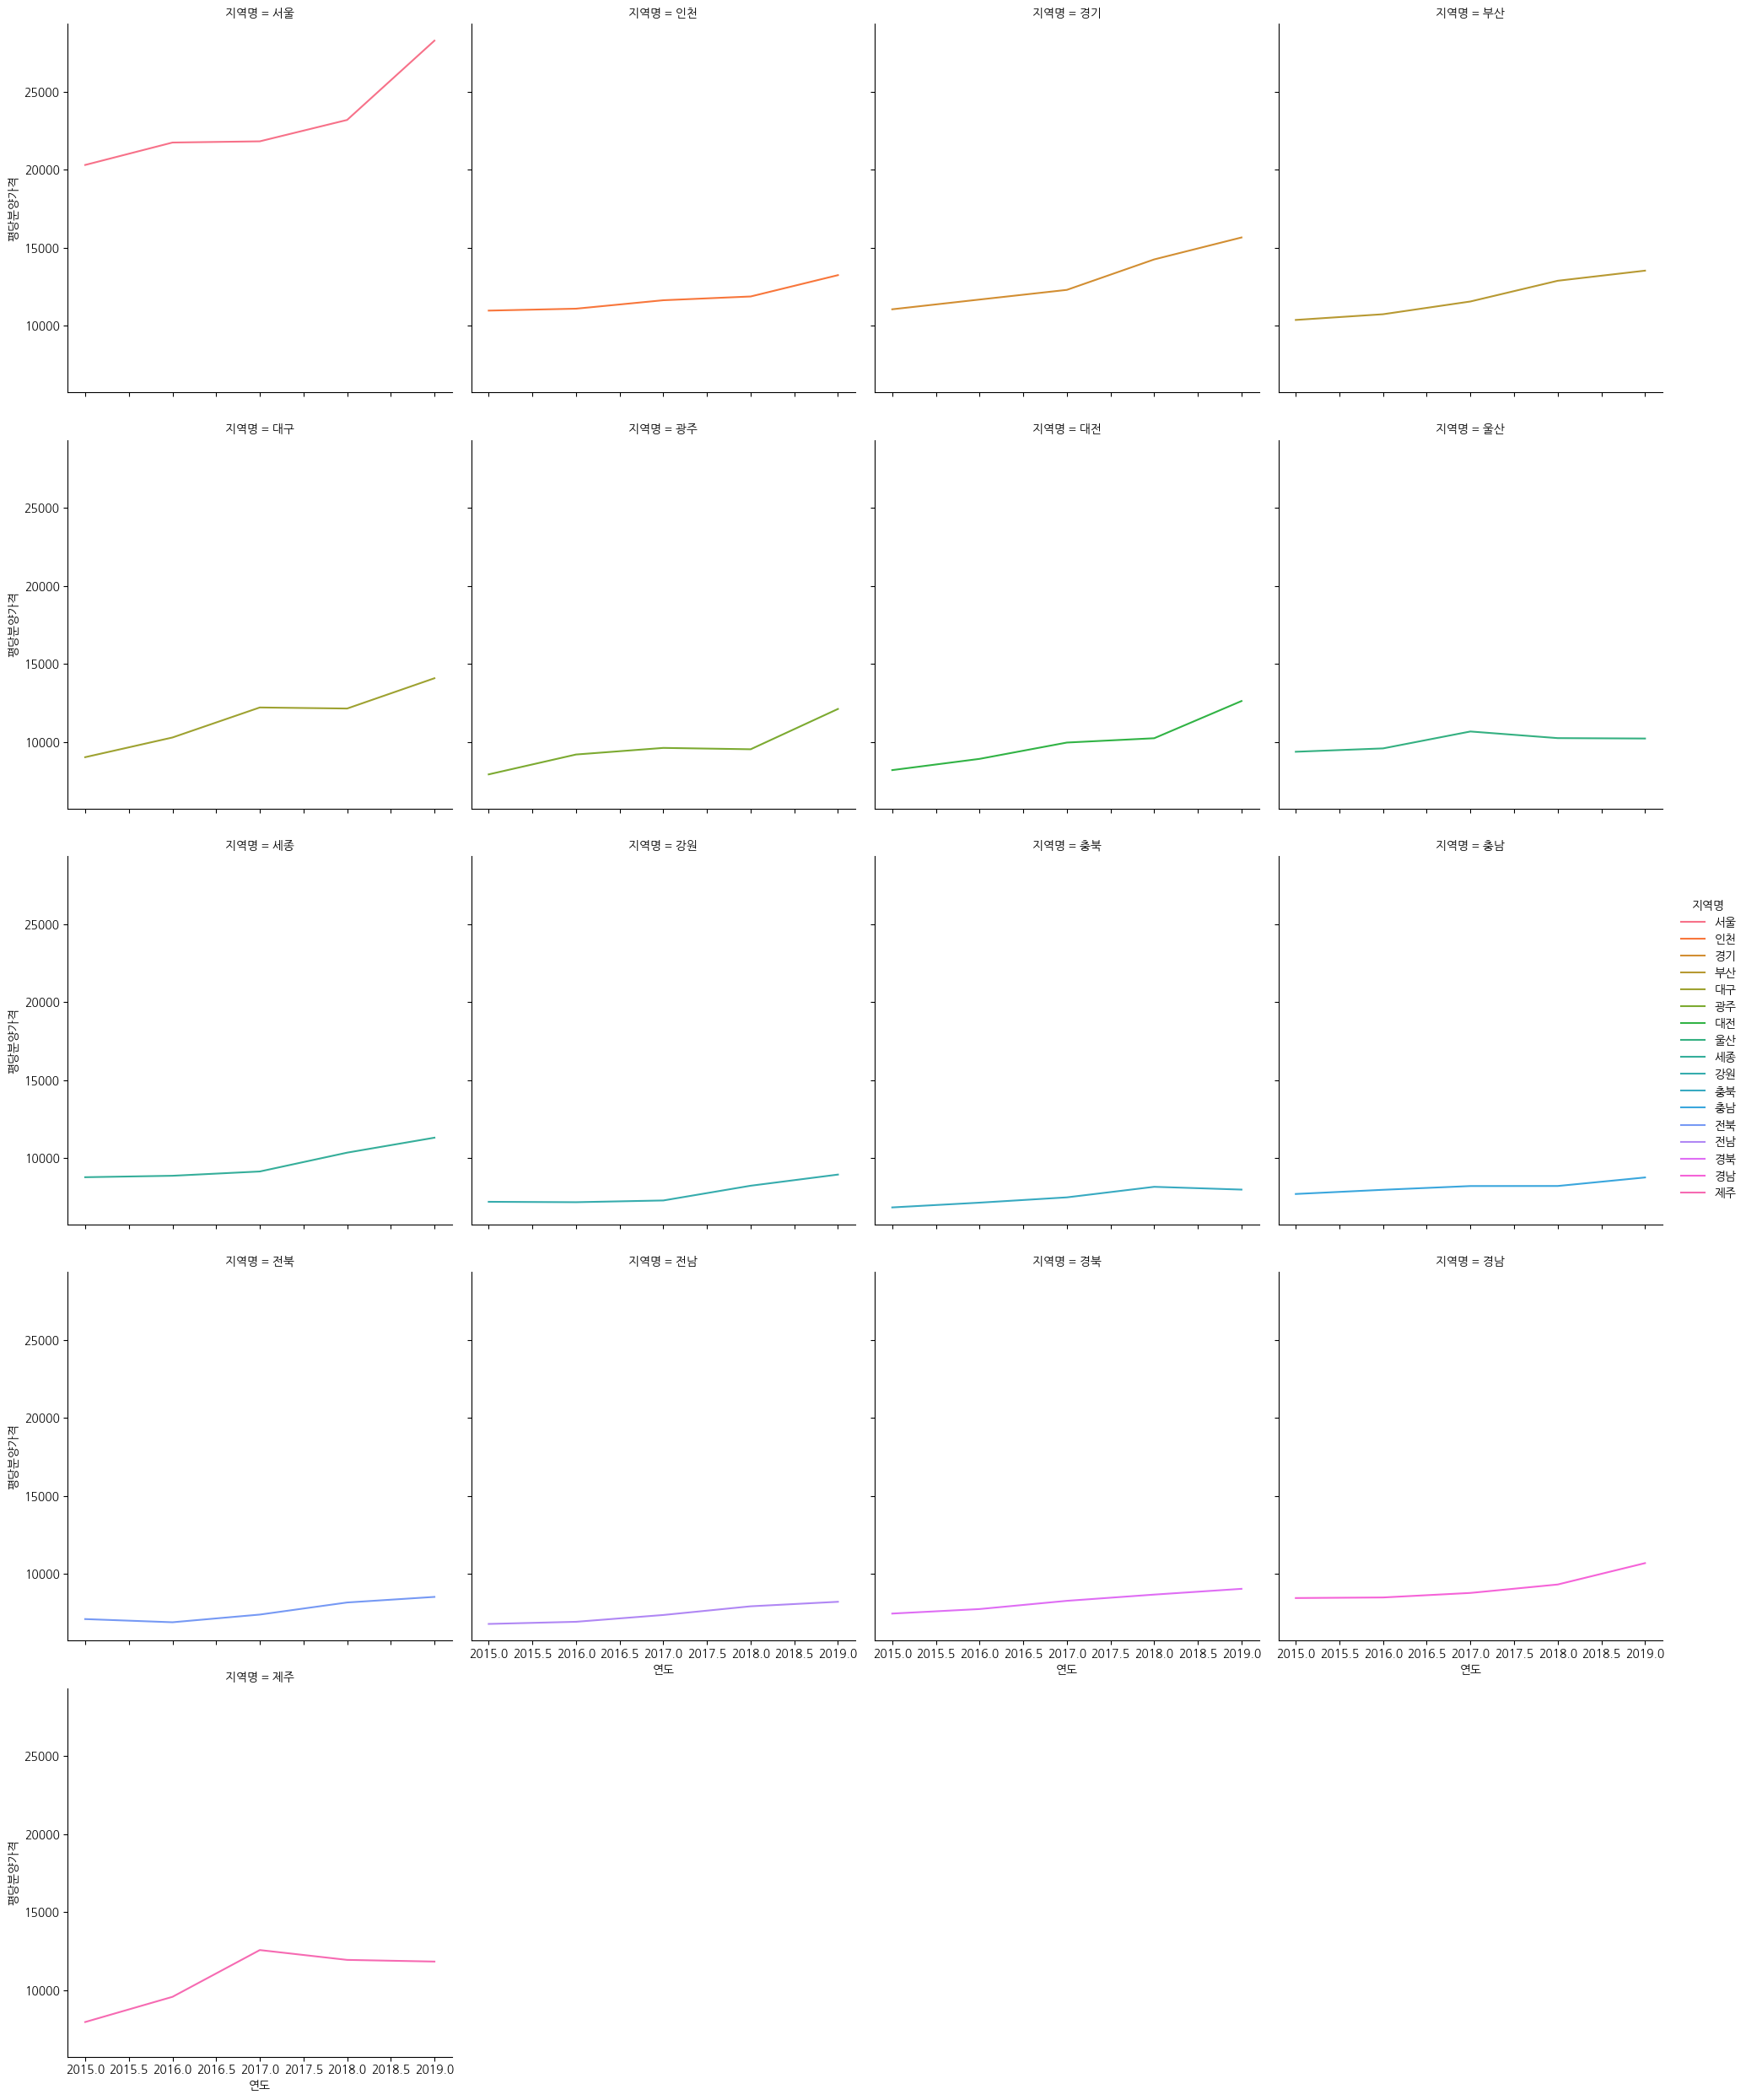

In [ ]:
sns.relplot(data = df_last, x = '연도', y = '평당분양가격', hue = '지역명',
           kind = 'line', col = '지역명', col_wrap = 4, errorbar = None)

### boxplot과 violinplot

<Axes: xlabel='연도', ylabel='평당분양가격'>

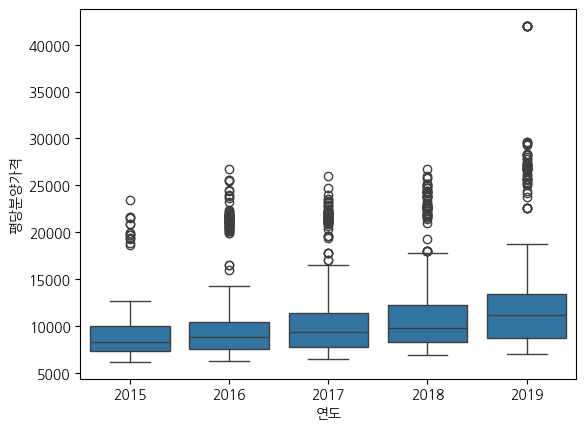

In [ ]:
sns.boxplot(data = df_last, x = '연도', y = '평당분양가격')

<Axes: xlabel='연도', ylabel='평당분양가격'>

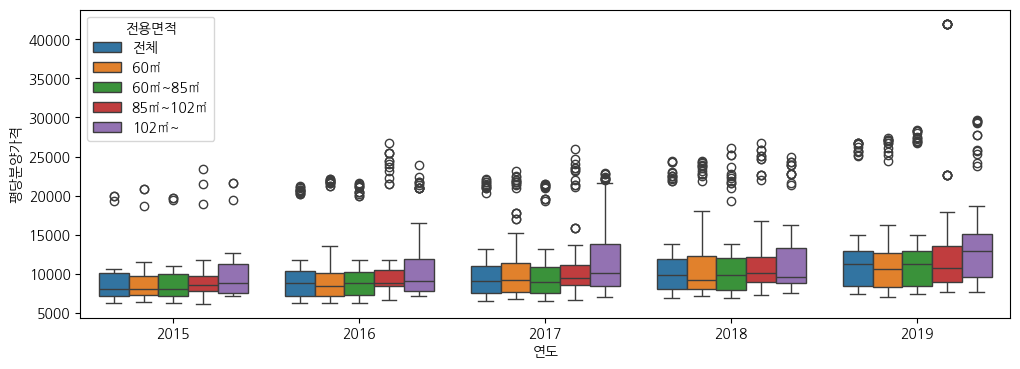

In [ ]:
# hue옵션을 사용하여 전용면적별로 표시
plt.figure(figsize = (12, 4))
sns.boxplot(data = df_last, x = '연도', y = '평당분양가격', hue = '전용면적')

<Axes: xlabel='연도', ylabel='평당분양가격'>

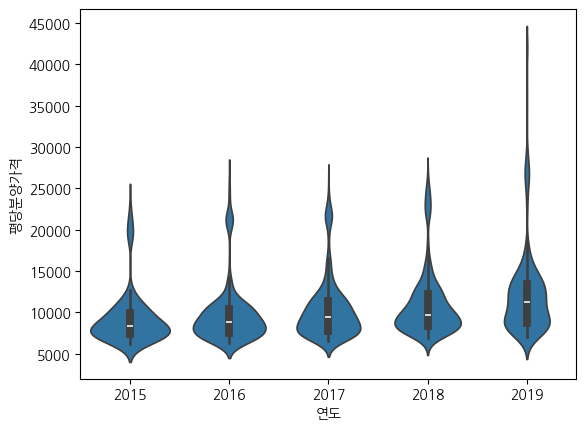

In [ ]:
# violinplot
sns.violinplot(data = df_last, x = '연도', y = '평당분양가격')

### lmplot과 swarmplot

In [ ]:
df_last['연도'].unique()

array([2015, 2016, 2017, 2018, 2019])

<Axes: xlabel='연도', ylabel='평당분양가격'>

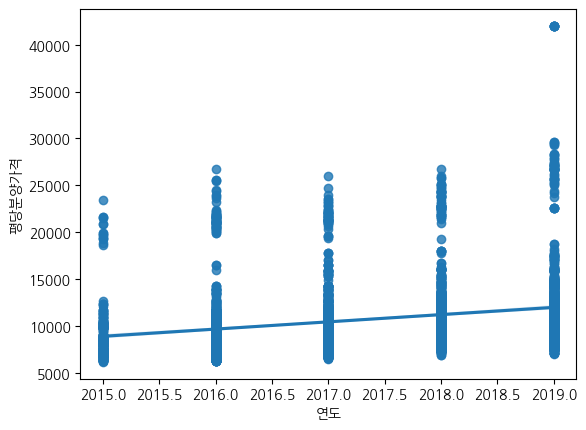

In [ ]:
sns.regplot(data = df_last, x = '연도', y = '평당분양가격')

<Axes: xlabel='연도', ylabel='평당분양가격'>

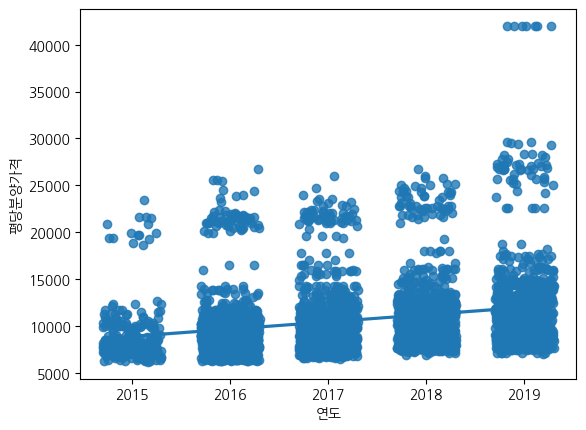

In [ ]:
# x_jitter를 사용해 연도당 포인트들을 좀 더 옆으로 퍼트려서 시각화
sns.regplot(data = df_last, x = '연도', y = '평당분양가격', x_jitter = 0.1)

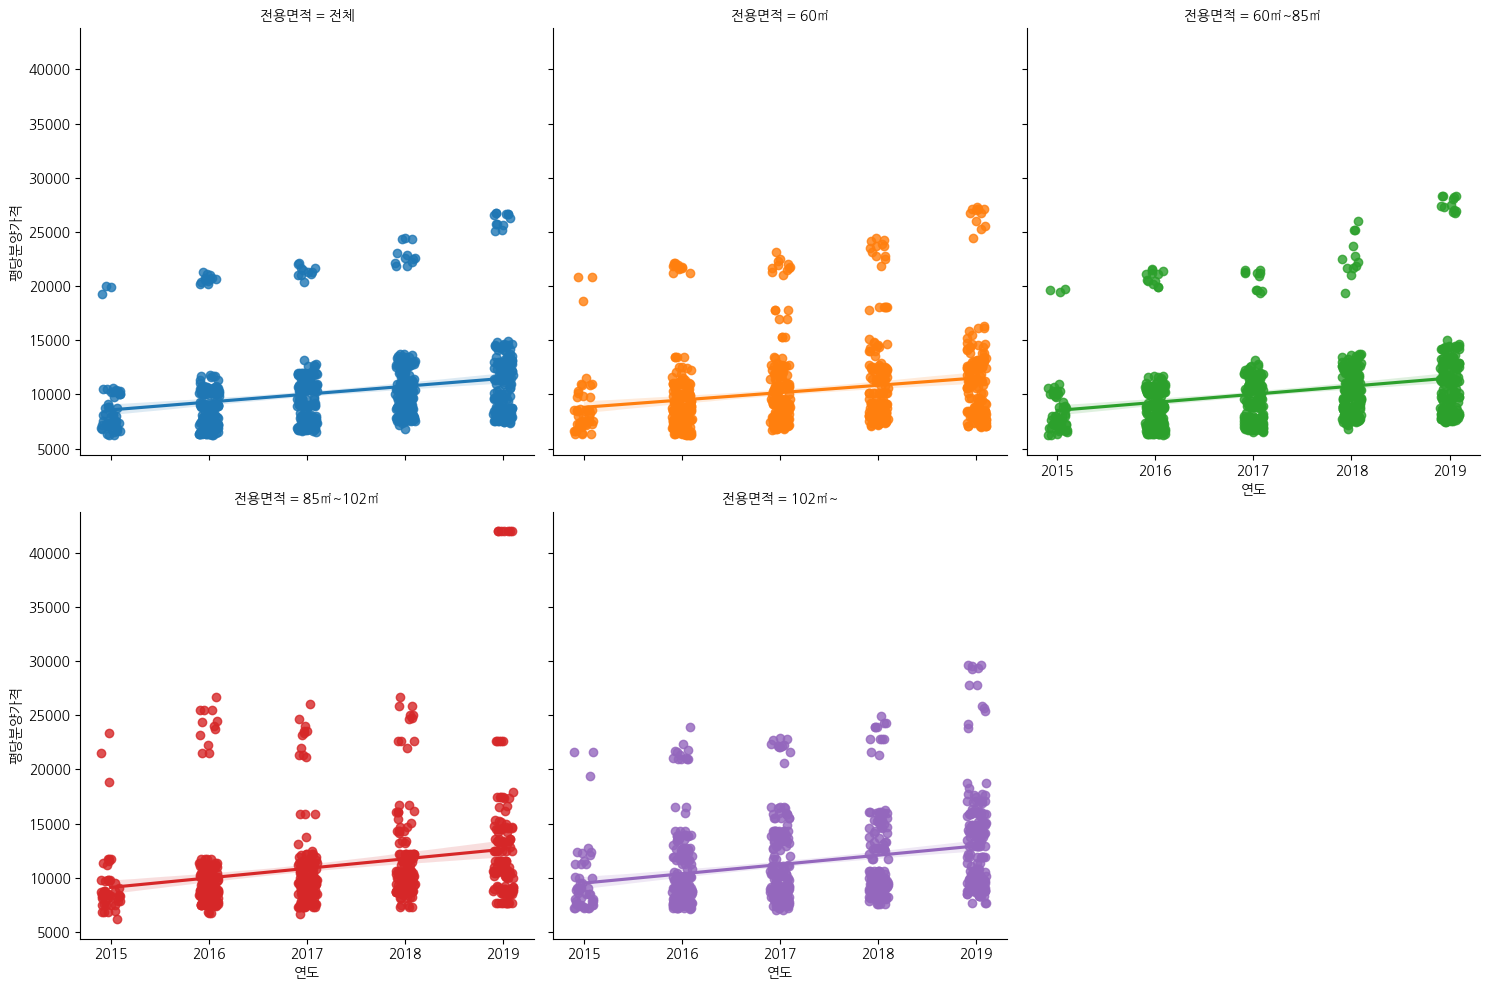

In [ ]:
# 연도별 평당분양가를 lmplot으로 시각화
# hue옵션을 사용해 전용면적을 표현
sns.lmplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적", col="전용면적", col_wrap=3,  x_jitter=.1)

<Axes: xlabel='연도', ylabel='평당분양가격'>

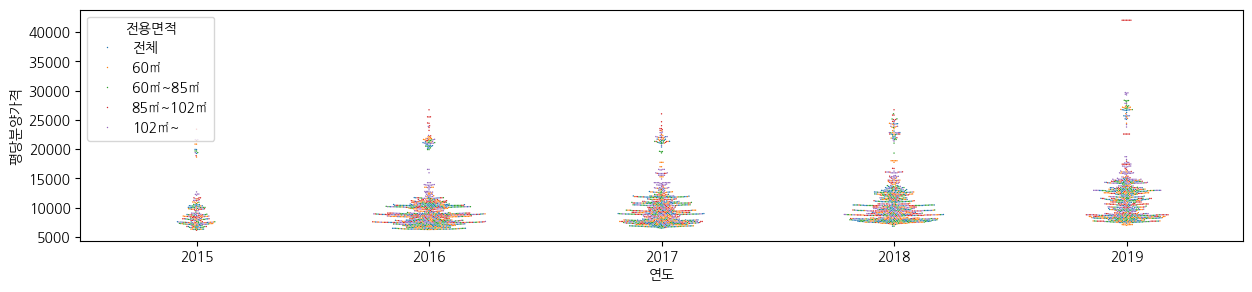

In [ ]:
# 연도별 평당분양가격을 swarmplot으로 시각화
# 범주형 데이터의 산점도를 표현가능
plt.figure(figsize = (15,3))
sns.swarmplot(data = df_last, x = '연도', y = '평당분양가격', hue = '전용면적' , size = 1)

### 이상치 (outlier) 확인

In [ ]:
# 평당분양가격의 최대값을 구해서 max_price 라는 변수에 담기

df_last['평당분양가격'].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

In [ ]:
max_price = df_last['평당분양가격'].max()
max_price

42002.399999999994

In [ ]:
# 서울의 평당분양가격이 특히 높은 row를 특정할 수 있음
df_last[df_last['평당분양가격'] == max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


### distribution plot

distplot은 결측치가 있으면 오류가 남. 따라서 결측치를 처리하고 시각화를 해야함

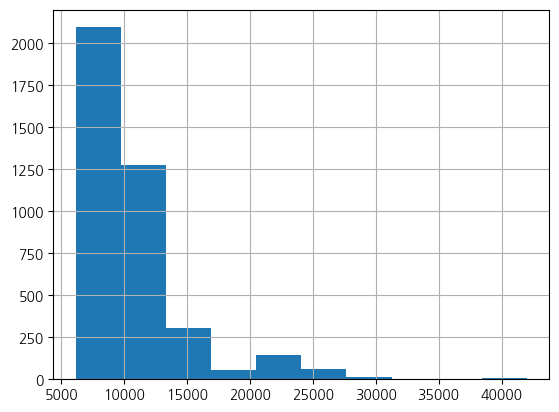

In [ ]:
h = df_last['평당분양가격'].hist(bins = 10)

In [ ]:
# .loc(row)
# .loc(row, column)
price = df_last.loc[df_last['평당분양가격'].notnull(), '평당분양가격']
price

0       19275.3
1       18651.6
2       19410.6
3       18879.3
4       19400.7
         ...   
4327    10114.5
4328    10715.1
4330    12810.6
4332    12863.4
4334    11883.3
Name: 평당분양가격, Length: 3957, dtype: float64

<ipython-input-31-835e20f41f46>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(price)


<Axes: xlabel='평당분양가격', ylabel='Density'>

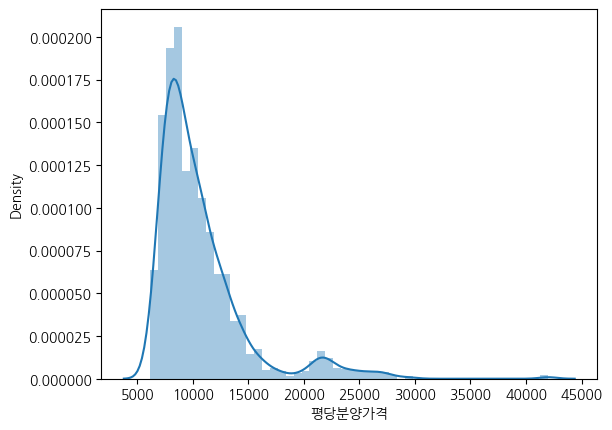

In [ ]:
# distplot을 사용해 평당분양가격을 시각화
sns.distplot(price)

<ipython-input-33-f3ca1378e182>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(price, shade = True)


<Axes: xlabel='평당분양가격', ylabel='Density'>

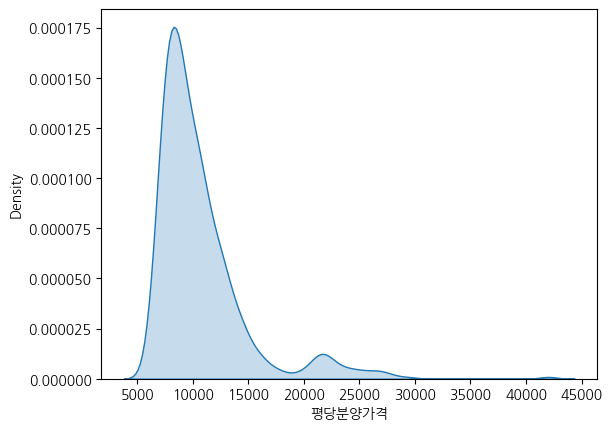

In [ ]:
sns.kdeplot(price, shade = True)

<Axes: xlabel='평당분양가격'>

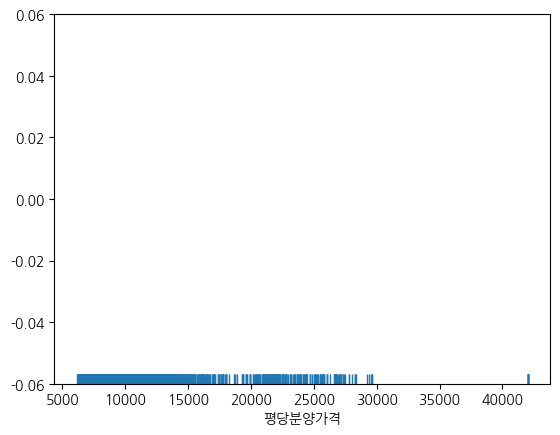

In [ ]:
sns.rugplot(price)

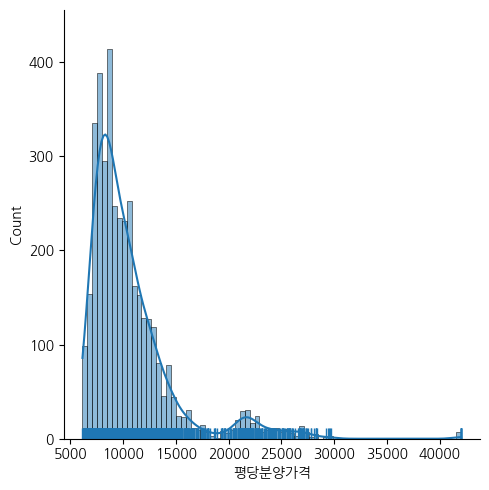

In [ ]:
# distplot과 displot중 그냥 displot쓰기
sns.displot(price, kde = True, rug = True)

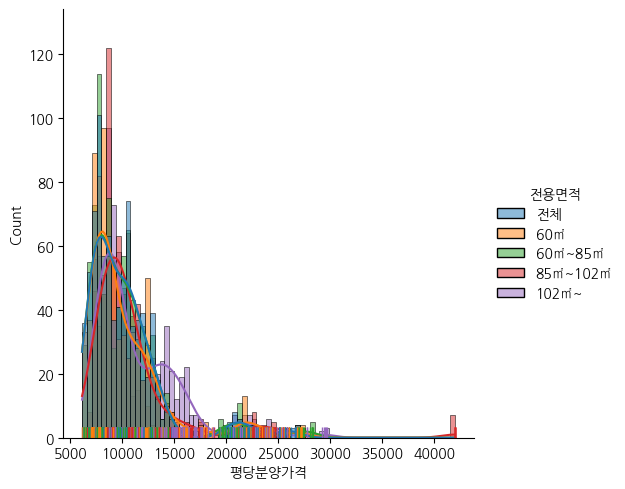

In [ ]:
sns.displot(df_last, x = '평당분양가격', kde = True, rug = True, hue = '전용면적')

<Figure size 1000x400 with 0 Axes>

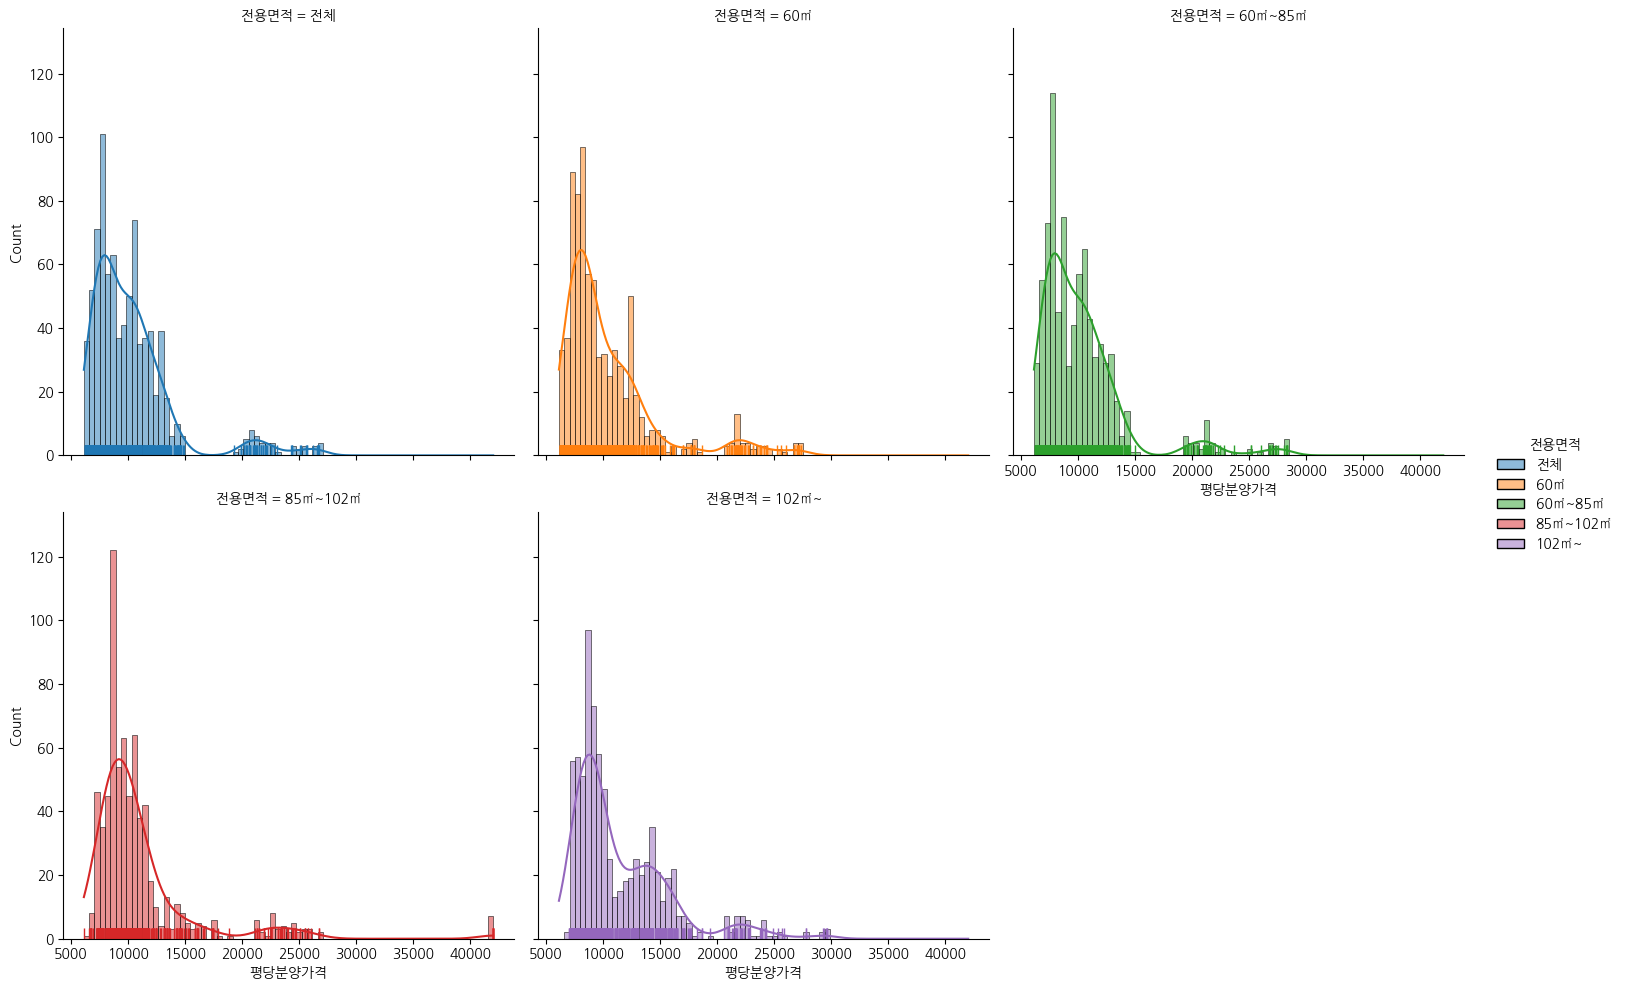

In [ ]:
plt.figure(figsize = (10, 4))
sns.displot(df_last, x = '평당분양가격', kde = True, rug = True, hue = '전용면적', col = '전용면적', col_wrap = 3)

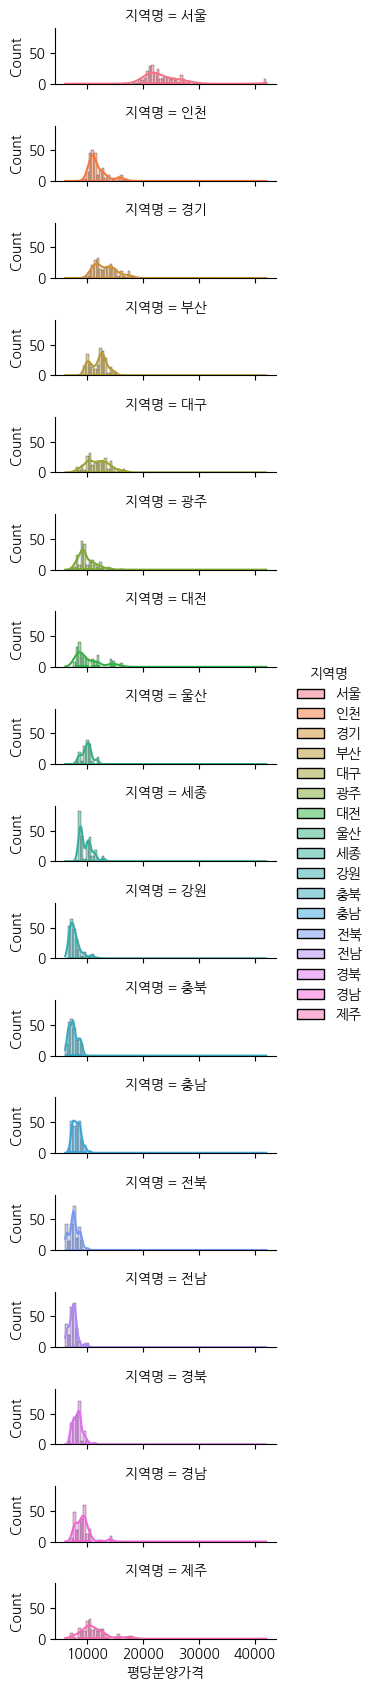

In [ ]:
# aspect는 그래프의 가로길이, height은 새로길이를 나타냄
sns.displot(df_last, x = '평당분양가격', kde = True, rug = True,
            hue = '지역명', col = '지역명', col_wrap = 1, aspect = 5, height = 1)

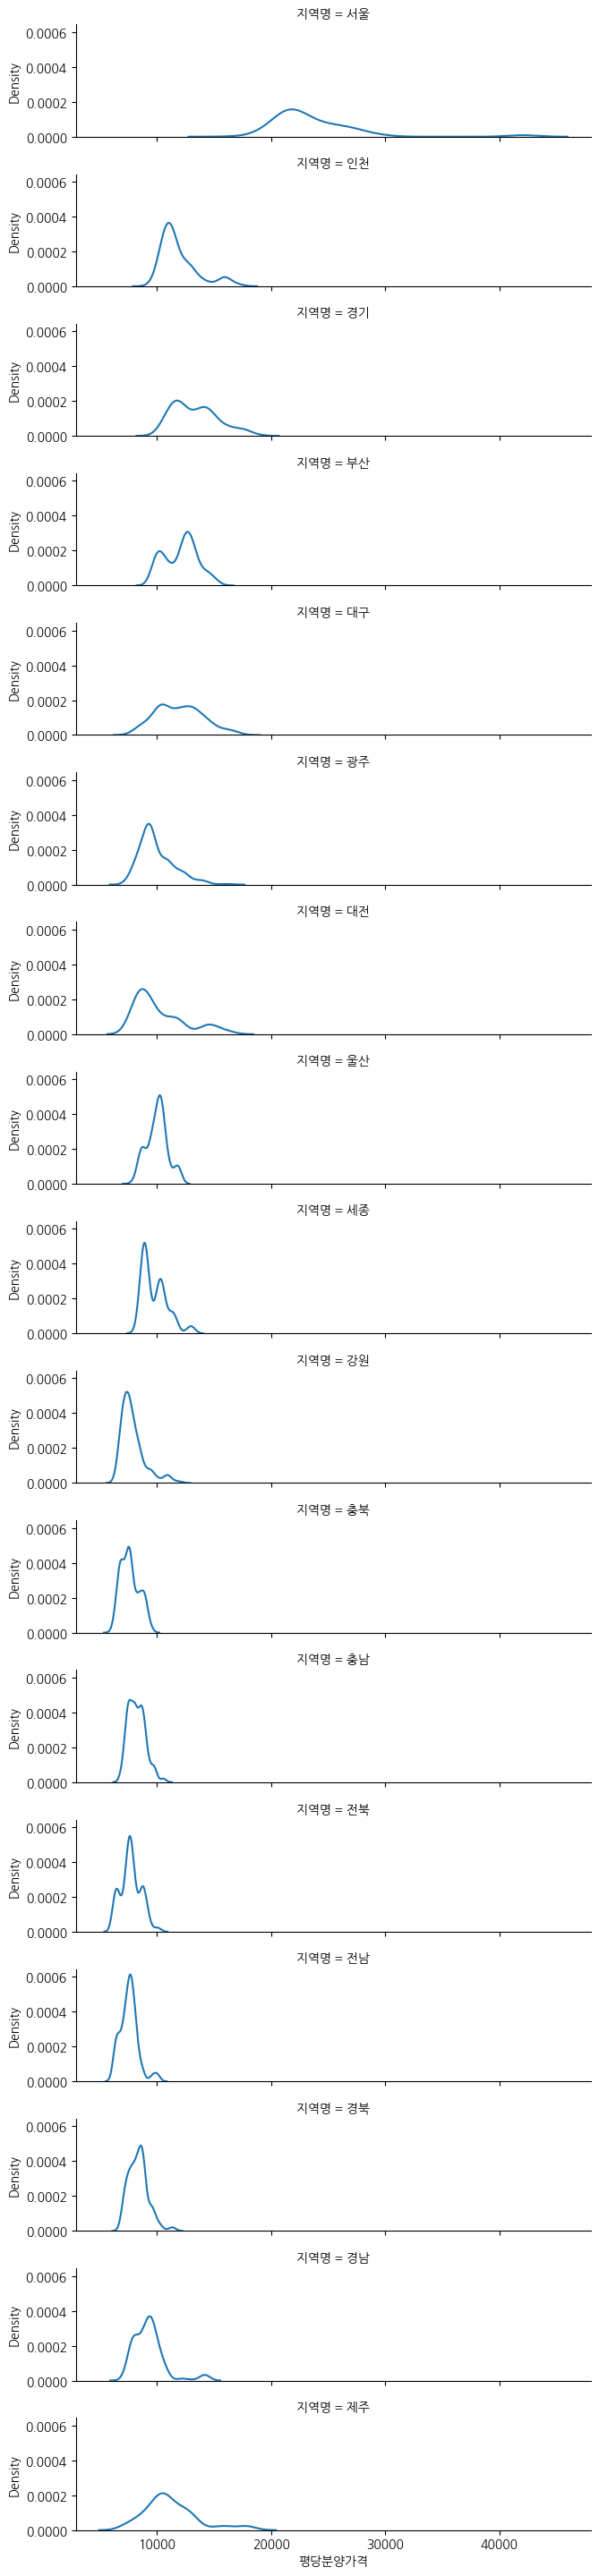

In [ ]:
# FacetGrid를 사용해 판을 만든 후
g = sns.FacetGrid(df_last, row="지역명",
                  height=1.7, aspect=4,)
# map을 사용해 FacetGrid안에 그래프를 넣는다
g.map(sns.kdeplot, "평당분양가격");

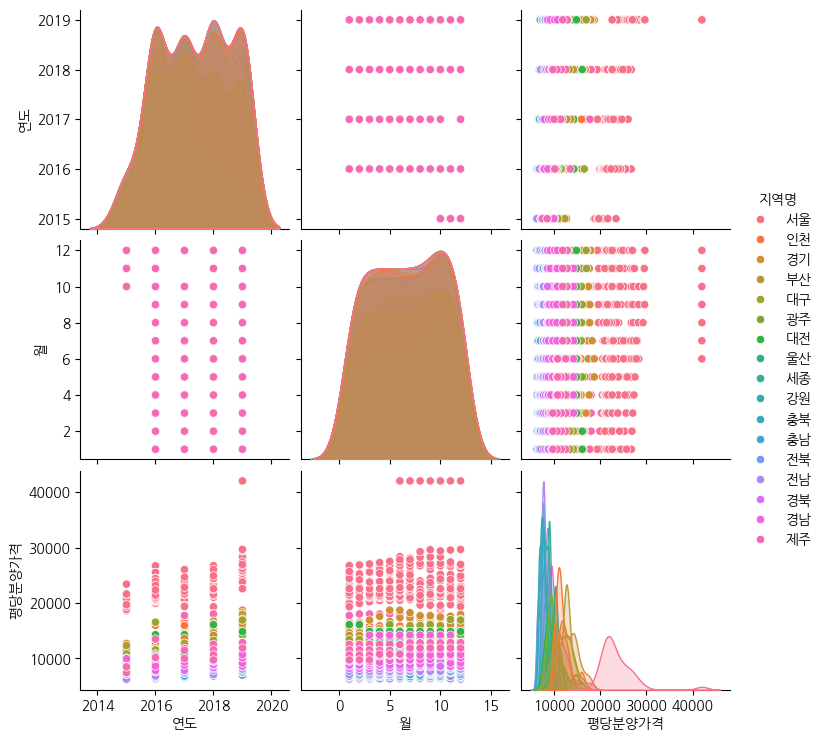

In [ ]:
# pairplot (pairplot또한 결측치가 존재하면 안됨)
df_last_notnull = df_last.loc[df_last['평당분양가격'].notnull(), ['연도', '월', '평당분양가격', '지역명', '전용면적']]
sns.pairplot(df_last_notnull, hue = '지역명')

In [ ]:
# 전용면적 별로 value_counts를 사용해 데이터를 집계
df_last['전용면적'].value_counts()

전용면적
전체          867
60㎡         867
60㎡~85㎡     867
85㎡~102㎡    867
102㎡~       867
Name: count, dtype: int64

## 2013 ~ 2015년 데이터 보기

In [ ]:
pd.options.display.max_columns = 25

In [ ]:
df_last.head()

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


In [ ]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [ ]:
# df_first 데이터 셋의 변수들에 대한 정보를 info()를 통해 확인
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [ ]:
# 결측치 확인
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

### melt로 tidy data 만들기

* pandas의 melt를 사용해 df_first를 tidy data의 형태로 가공 (df_last는 이미 tidy data 형태)
* tidy data
  * 각 변수는 하나의 column을 이룸
  * 각 관측값은 하나의 row를 이룸
  * 각 데이터셋은 하나의 관찰 단위 유형에 대한 정보만 포함해야함 (판매 데이터와 직원데이터는 하나의 테이블에 결합되면 안됨)

In [ ]:
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [ ]:
df_last.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


In [ ]:
# id_vars: 변환 후에도 그대로 유지할 column
# var_name: 변환된 데이터에 새로 생성될 변수 이름
# value_name: 변환된 데이터 새로 생성될 값 이름
df_first.melt(id_vars = '지역', var_name = '기간', value_name = '평당분양가격')

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [ ]:
df_first_melt = df_first.melt(id_vars = '지역', var_name = '기간', value_name = '평당분양가격')
df_first_melt.head()

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [ ]:
# df_first_melt 변수에 담겨진 column의 이름 변경
df_first_melt.columns = ['지역명', '기간', '평당분양가격']
df_first_melt.head()

,지역명,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


### 연도와 월을 분리하기

In [ ]:
date = '2013년12월'

# '년'을 기준으로 텍스트를 분리해 list형태로 return
date.split('년')

['2013', '12월']

In [ ]:
# list의 인덱싱을 사용해 연도만 가져올 수 있음
date.split('년')[0]

'2013'

In [ ]:
# list의 인덱싱과 replace()를 사용해 '월'을 제거

date.split('년')[-1].replace('월', '')

'12'

In [ ]:
# parse_year라는 연도만 반환하는 함수를 생성

def parse_year(date):
  year = date.split('년')[0]
  year = int(year)
  return year

y = parse_year(date)
print(type(y))
y

<class 'int'>


2013

In [ ]:
# parse_month 라는 월만 반환하는 함수를 생성

def parse_month(date):
  month = date.split('년')[-1].replace('월', '')
  month = int(month)
  return month

m = parse_month(date)
print(type(m))
m

<class 'int'>


12

In [ ]:
# apply()를 사용해 df_first_melt데이터에 '연도'와 '월' column을 생성
df_first_melt['연도'] = df_first_melt['기간'].apply(parse_year)
df_first_melt['월'] = df_first_melt['기간'].apply(parse_month)
df_first_melt.head()

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


In [ ]:
# df_last와 병합하기 위해서는 column들의 이름이 같아야함
df_last.columns.to_list()

['지역명', '연도', '월', '분양가격', '평당분양가격', '전용면적']

In [ ]:
# df_last와 df_first에 모두 존재하는 column들을 따로 저장
cols = ['지역명', '연도', '월', '평당분양가격']

In [ ]:
# df_last에는 df_first에 존재하지 않는 '전용면적' column이 존재함
# 그렇기 때문에 '전용면적' 중 전체에 해당하는 값만 사용
# df_last (원본데이터)의 변형을 막기위해 copy()를 사용
df_last_prepare = df_last.loc[
    df_last['전용면적'] == '전체', cols].copy()
df_last_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6


In [ ]:
# df_first_melt에서 공통된 칼럼만 가져옴
df_first_prepare = df_first_melt[cols].copy()
df_first_prepare.head(1)

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189


## concat()를 사용해 데이터 합치기

In [ ]:
df = pd.concat([df_first_prepare, df_last_prepare])
df

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0
...,...,...,...,...
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9


In [ ]:
df['연도'].value_counts(sort = False)

연도
2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
Name: count, dtype: int64

## pivot_table 사용하기

In [ ]:
# 연도를 인덱스로, 지역명을 칼럼으로 평당분양가를 나타내보기
t = pd.pivot_table(df, index = '연도', columns = '지역명',
                   values = '평당분양가격').round()
t

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


<Axes: xlabel='지역명', ylabel='연도'>

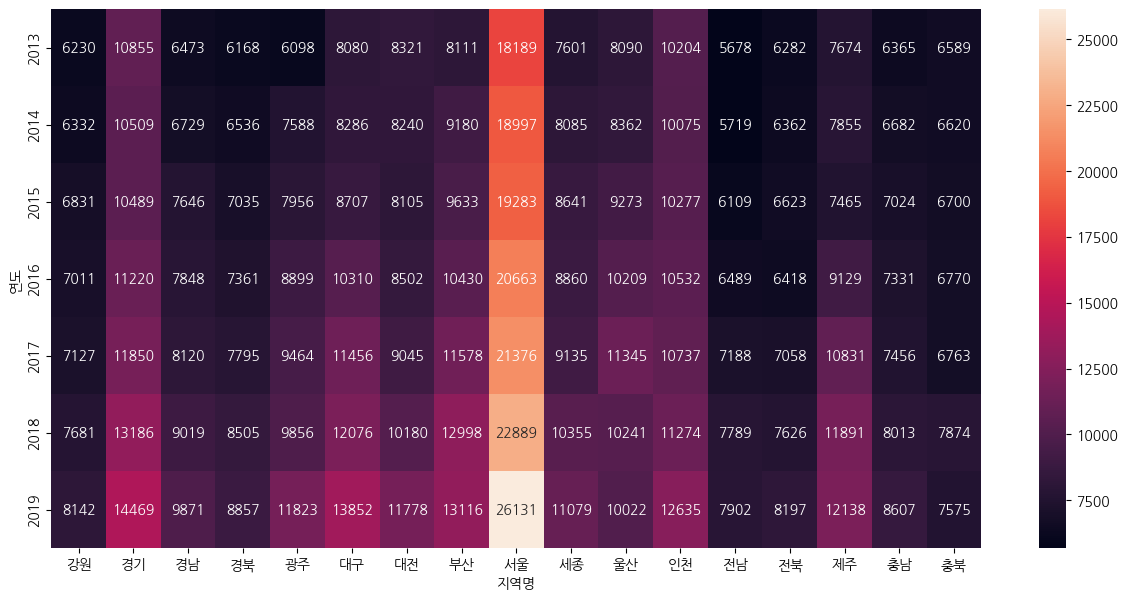

In [ ]:
# 위의 피폿테이블을 히트맵으로 표현
# annot = True는 숫자들을 표시
plt.figure(figsize = (15, 7))
sns.heatmap(t, annot = True, fmt = '.0f')

In [ ]:
# transpose()를 사용해서 row와 column을 바꿀 수 있음
t.transpose()

연도,2013,2014,2015,2016,2017,2018,2019
지역명,,,,,,,
강원,6230.0,6332.0,6831.0,7011.0,7127.0,7681.0,8142.0
경기,10855.0,10509.0,10489.0,11220.0,11850.0,13186.0,14469.0
경남,6473.0,6729.0,7646.0,7848.0,8120.0,9019.0,9871.0
경북,6168.0,6536.0,7035.0,7361.0,7795.0,8505.0,8857.0
광주,6098.0,7588.0,7956.0,8899.0,9464.0,9856.0,11823.0
대구,8080.0,8286.0,8707.0,10310.0,11456.0,12076.0,13852.0
대전,8321.0,8240.0,8105.0,8502.0,9045.0,10180.0,11778.0
부산,8111.0,9180.0,9633.0,10430.0,11578.0,12998.0,13116.0
서울,18189.0,18997.0,19283.0,20663.0,21376.0,22889.0,26131.0


<Axes: xlabel='연도', ylabel='지역명'>

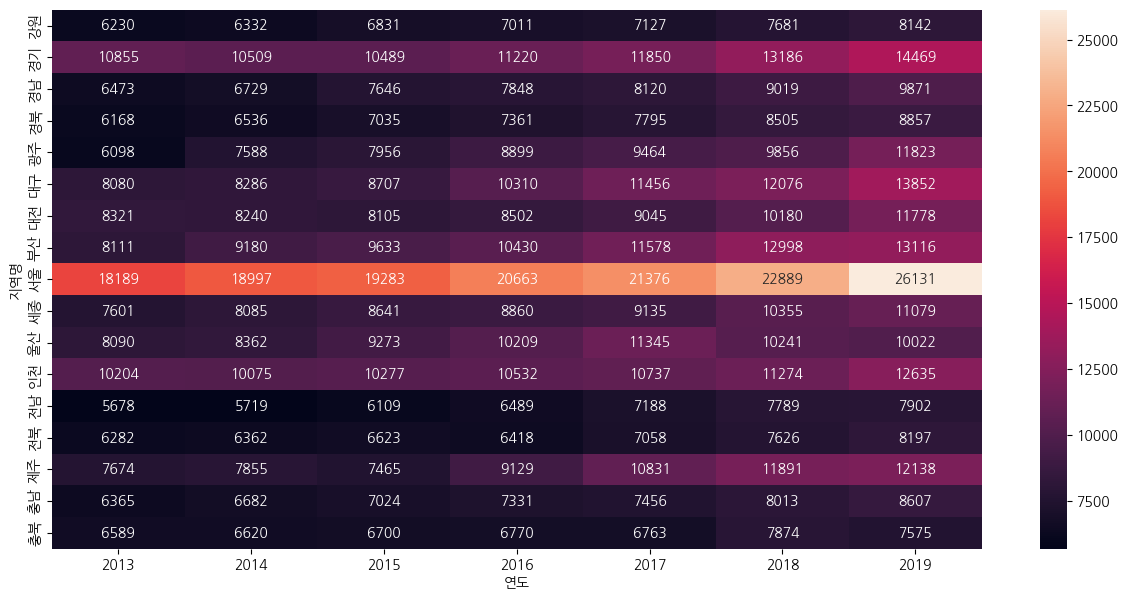

In [ ]:
plt.figure(figsize = (15, 7))
sns.heatmap(t.transpose(), annot = True, fmt = '.0f')

In [ ]:
g = df.groupby(['연도', '지역명'])['평당분양가격'].mean().unstack().round()
g

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


<Axes: xlabel='연도', ylabel='지역명'>

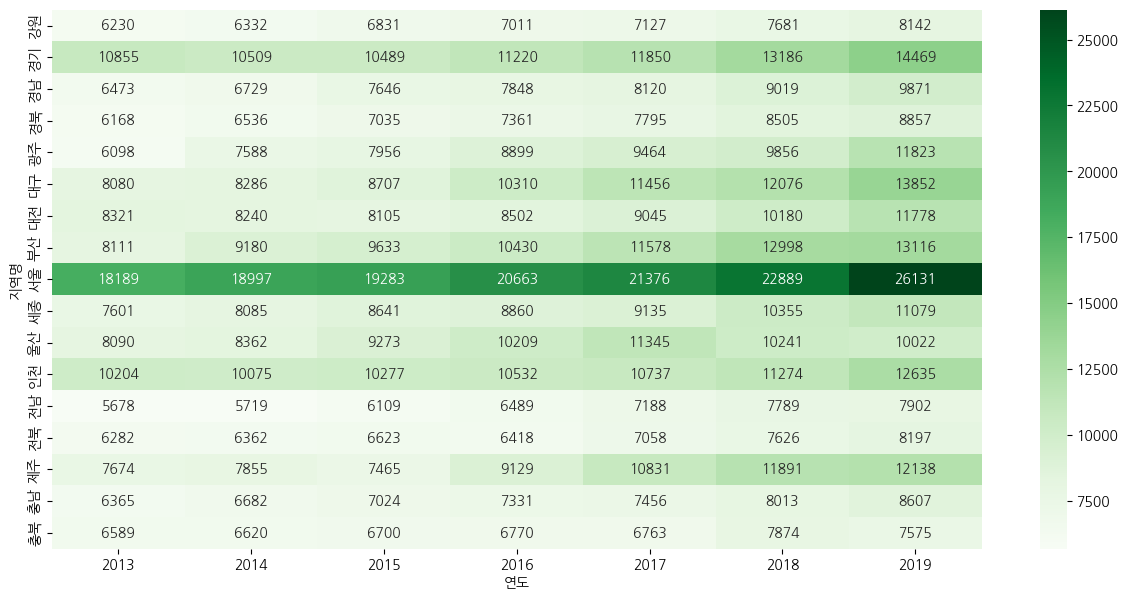

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(g.T, annot=True, fmt=".0f", cmap="Greens")

### 합쳐진 데이터 시각화

## 연도별 평당분양가 보기

In [ ]:
df_yearly = pd.pivot_table(df, index = ['연도', '지역명'],
                           values = '평당분양가격', aggfunc = 'mean')
df_yearly

평당분양가격
연도   지역명          
2013 강원    6230.00
     경기   10855.00
     경남    6473.00
     경북    6168.00
     광주    6098.00
...            ...
2019 전남    7902.40
     전북    8196.65
     제주   12137.95
     충남    8606.95
     충북    7574.60

[119 rows x 1 columns]

<Axes: xlabel='연도', ylabel='평당분양가격'>

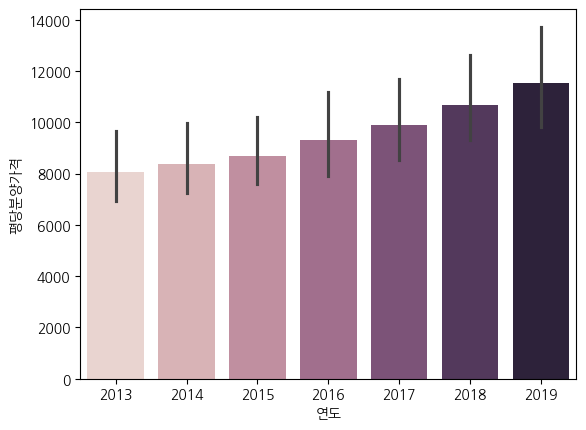

In [ ]:
# barplot
sns.barplot(data=df_yearly, x= '연도', y = "평당분양가격", hue = '연도', legend = False)

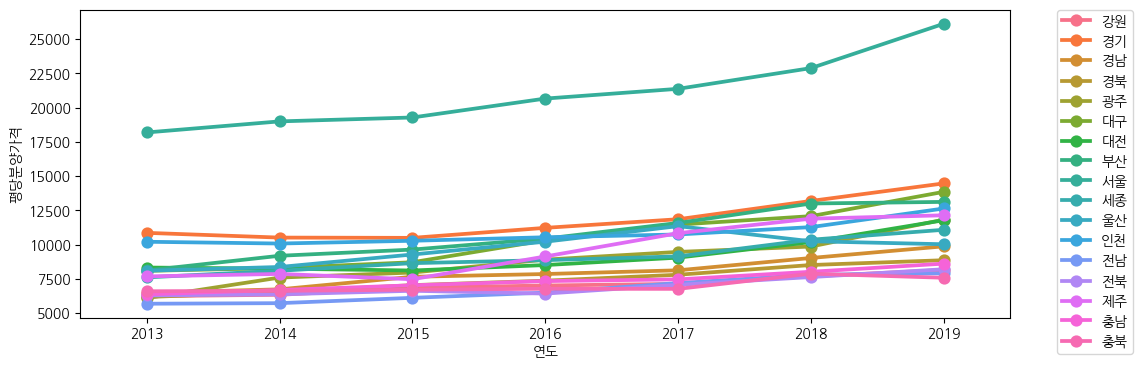

In [ ]:
# pointplot 으로 연도별 평당분양가격 시각화
plt.figure(figsize = (12, 4))
sns.pointplot(data = df_yearly, x = '연도', y = '평당분양가격', hue = '지역명')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [ ]:
# 서울만 barplot 으로 시각화
df_seoul = df[df['지역명'] == '서울'].copy()
df_seoul = pd.pivot_table(df_seoul, index = '연도', values = '평당분양가격', aggfunc = 'mean')
df_seoul

,평당분양가격
연도,
2013,18189.00
2014,18997.25
2015,19282.60
2016,20663.50
2017,21375.90
2018,22889.35
2019,26131.05


<Axes: xlabel='연도', ylabel='평당분양가격'>

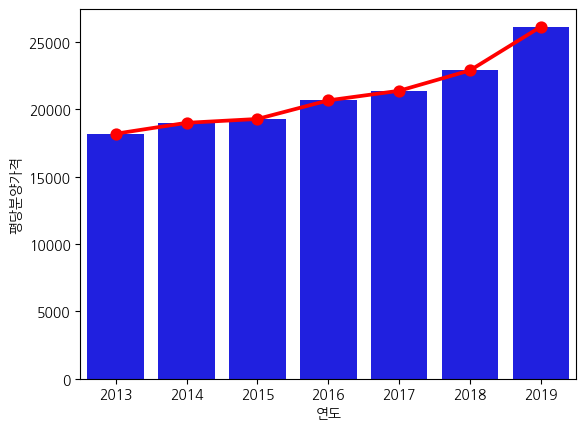

In [ ]:
sns.barplot(df_seoul, x = '연도', y = '평당분양가격', color = 'b')
sns.pointplot(df_seoul, x = '연도', y = '평당분양가격', color = 'r')

<Axes: xlabel='연도', ylabel='평당분양가격'>

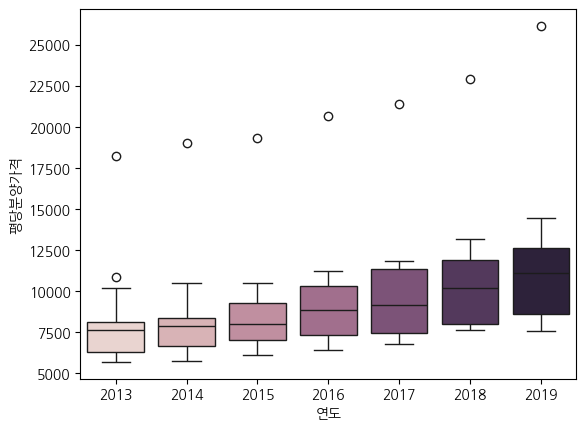

In [ ]:
# 연도별 평당분양가격 boxplot 시각화
sns.boxplot(data = df_yearly, x = '연도', y = '평당분양가격', hue = '연도', legend = False)

<Axes: xlabel='연도', ylabel='평당분양가격'>

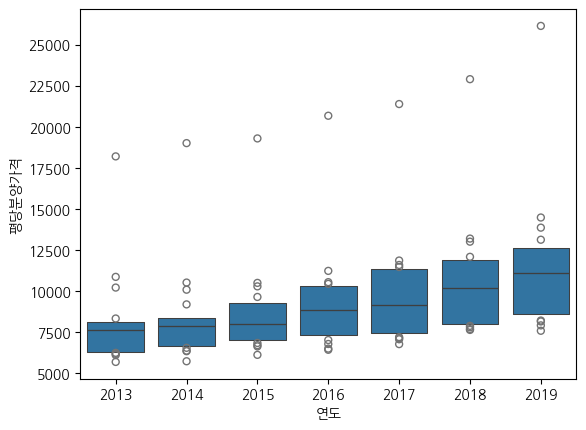

In [ ]:
sns.boxenplot(data = df_yearly, x = '연도', y = '평당분양가격')

Text(0.5, 1.0, '연도별 전국 평균 평당 분양가격(단위:천원)')

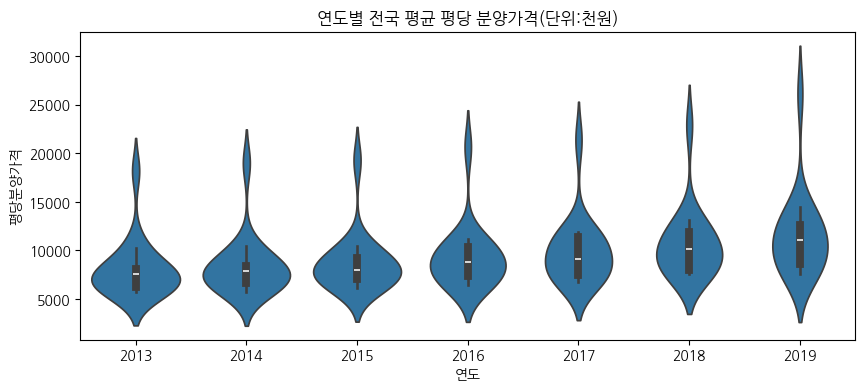

In [ ]:
# 연도별 평당분양가격 violinplot 시각화
plt.figure(figsize=(10, 4))
sns.violinplot(data=df_yearly, x="연도", y="평당분양가격").set_title("연도별 전국 평균 평당 분양가격(단위:천원)")

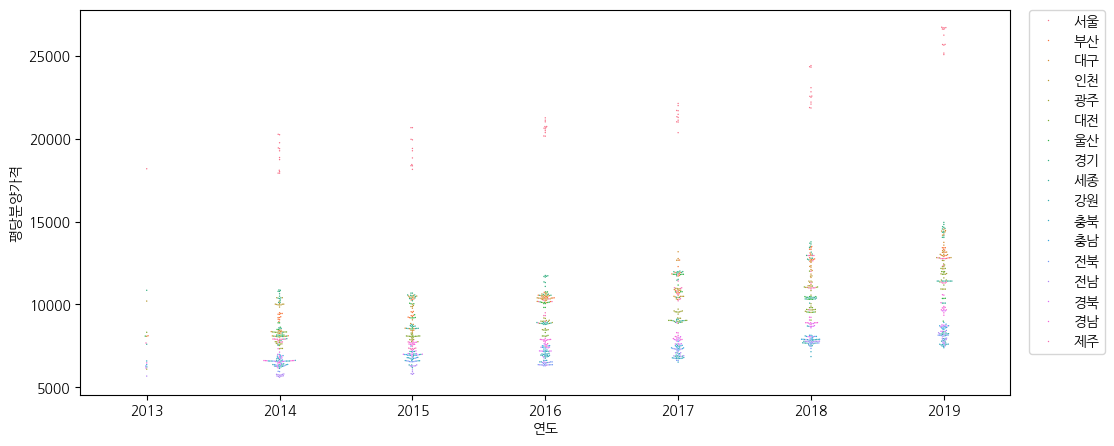

In [ ]:
# 연도별 평당분양가격 swarmplot 시각화
plt.figure(figsize=(12, 5))
sns.swarmplot(data=df.reset_index(drop=True), x="연도", y="평당분양가격", hue="지역명", size=1)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

### 지역별 평당분양가 보기

<Axes: xlabel='지역명', ylabel='평당분양가격'>

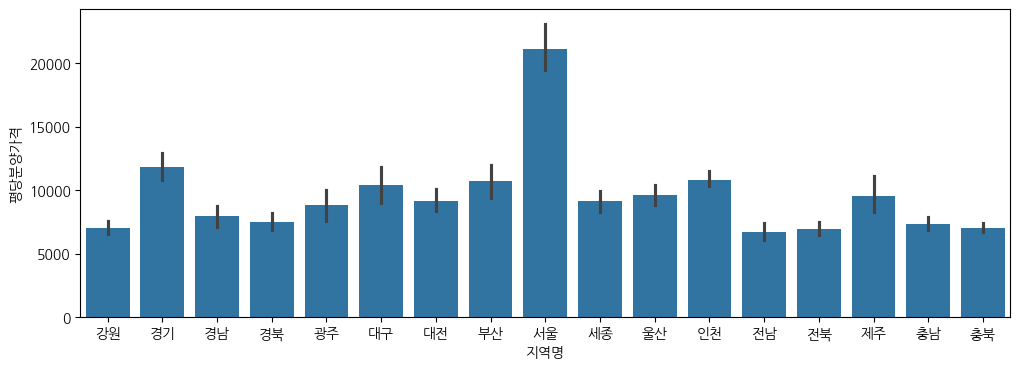

In [ ]:
# barplot으로 지역별 평당분양가격 시각화
plt.figure(figsize = (12, 4))
sns.barplot(data = df_yearly, x = '지역명', y = '평당분양가격')

<Axes: xlabel='지역명', ylabel='평당분양가격'>

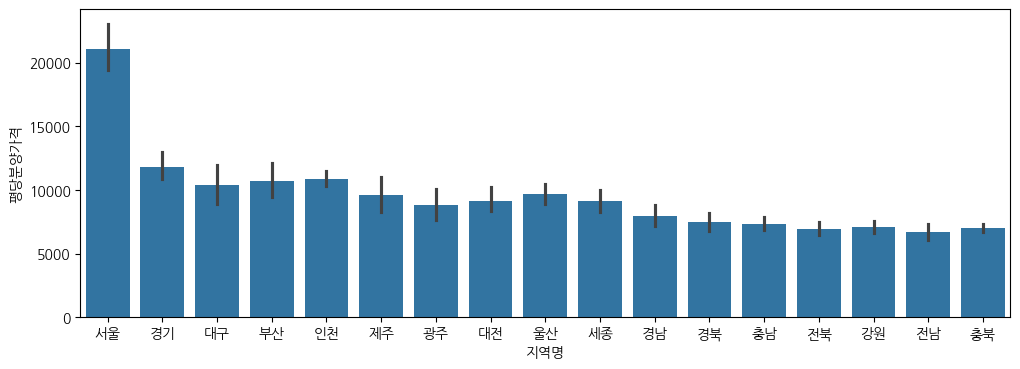

In [ ]:
# barplot으로 지역별 평당분양가격 순서대로 시각화
plt.figure(figsize = (12, 4))
sns.barplot(data = df_yearly.sort_values(by = '평당분양가격', ascending = False), x = '지역명', y = '평당분양가격')

<Axes: xlabel='지역명', ylabel='평당분양가격'>

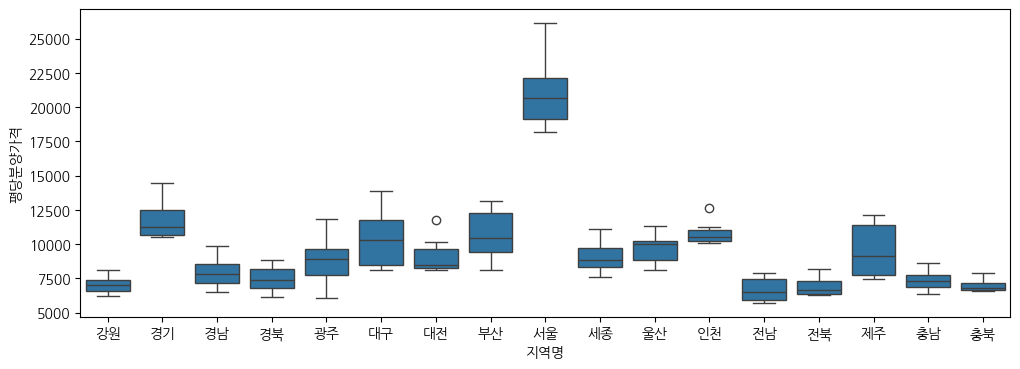

In [ ]:
# boxplot 으로 지역별 평당분양가격 시각화
plt.figure(figsize=(12, 4))
sns.boxplot(data=df_yearly, x="지역명", y="평당분양가격")

<Axes: xlabel='지역명', ylabel='평당분양가격'>

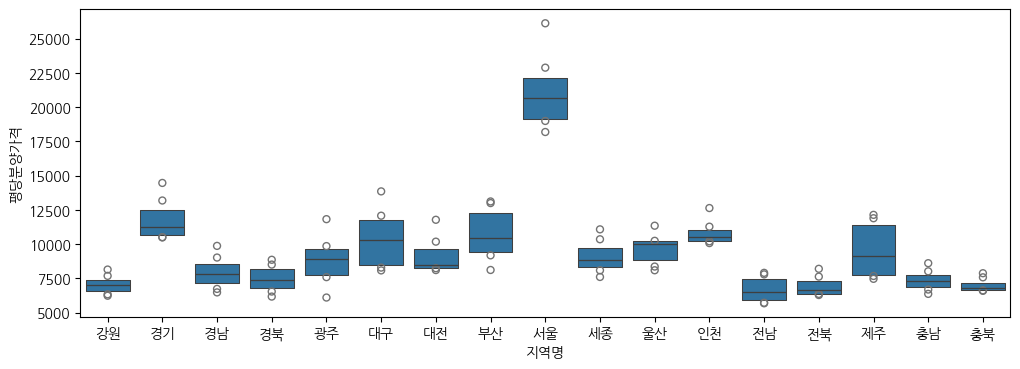

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxenplot(data=df_yearly, x="지역명", y="평당분양가격")

<Axes: xlabel='지역명', ylabel='평당분양가격'>

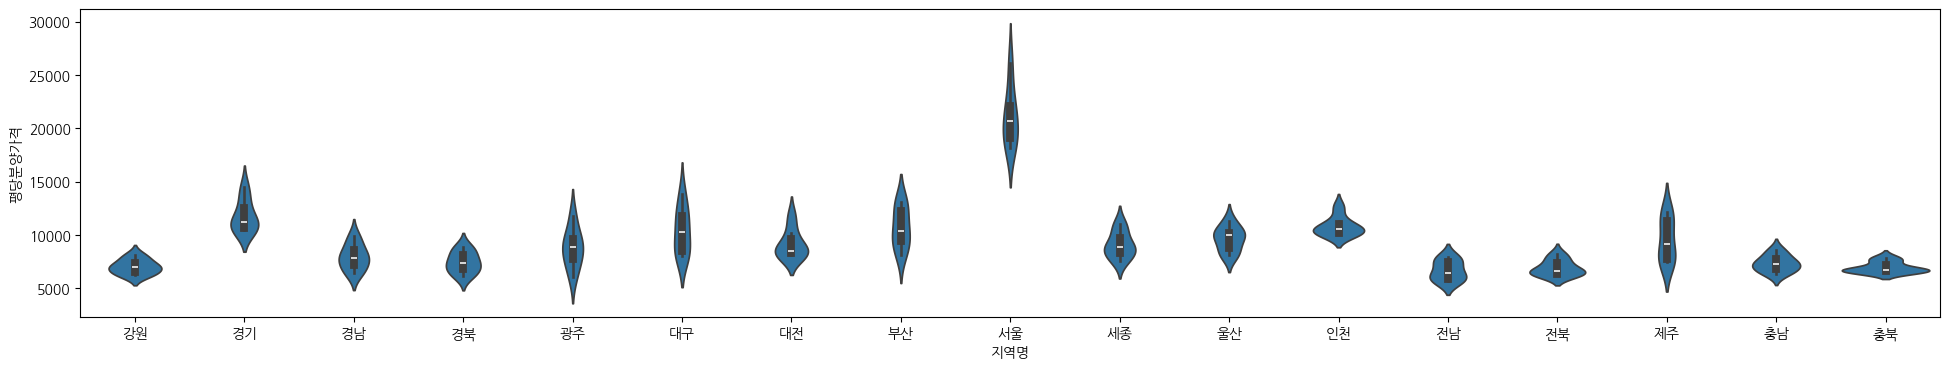

In [ ]:
# violinplot 으로 지역별 평당분양가격 시각화
plt.figure(figsize=(24, 4))
sns.violinplot(data=df_yearly, x="지역명", y="평당분양가격")

<Axes: xlabel='지역명', ylabel='평당분양가격'>

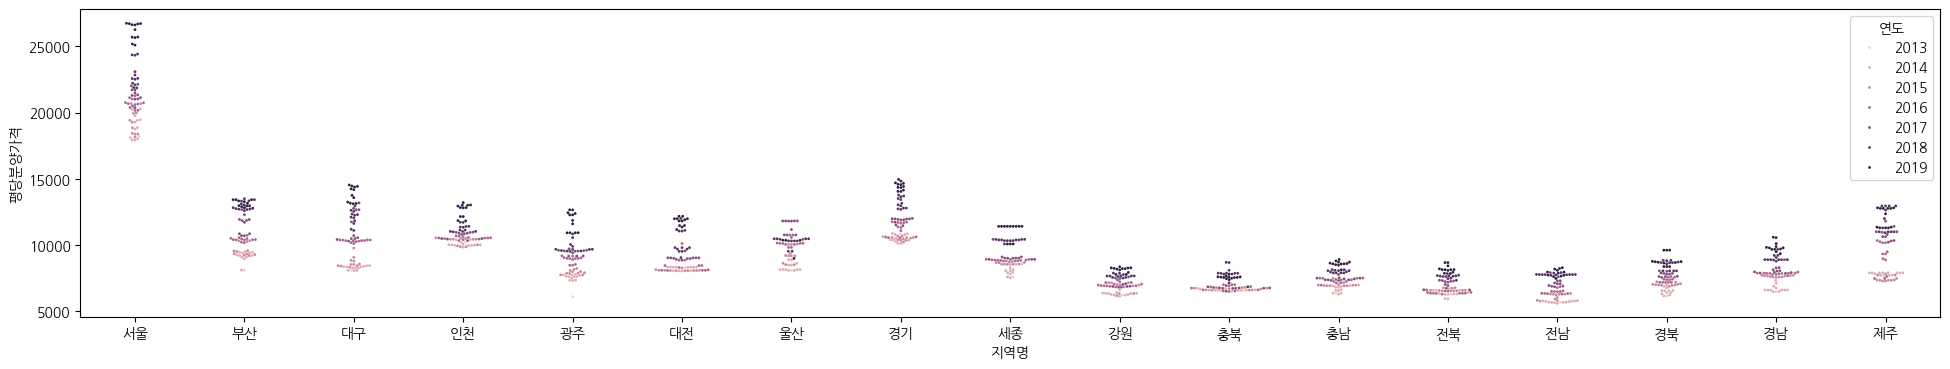

In [ ]:
# swarmplot 으로 지역별 평당분양가격을 시각화
plt.figure(figsize=(24, 4))
sns.swarmplot(data=df.reset_index(drop=True), x="지역명", y="평당분양가격", hue="연도", size=2)